### Problem Statement:
To identify patterns which indicate if a customer has difficulty in paying their loans which can be used for taking conduct similar as denying the loan, reducing the loan amount, lending at a advanced interest rate.

Two types of risk are associated with the  decision of bank-

1. still,  not approving the loan will result in a loss of business to the company, If the aspirant is likely to repay the loan.

2. still, If the aspirant is not likely to repay the loan. he or  she is likely to overpass, also approving the loan may lead to a fiscal loss for the company.

In other words, the company wants to understand the driving factors, i.e. the variables that are strong pointers of default. The company can use this knowledge for its portfolio and threat assessment.

#### Importing the libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

##### Reading the data

In [3]:
#reading application dataset
application_df=pd.read_csv('application_data.csv')
# show top 5 rows of application data
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#reading previous_application dataset
previous_application_df=pd.read_csv('previous_application.csv')
#show top 5 previous_application data 
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#reading columns_description dataset
columns_df = pd.read_csv('columns_description.csv', encoding='windows-1252')
#show top 5 columns_description data 
columns_df.head()


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


#### checking structure of application_df

In [9]:

application_df.shape

(307511, 122)

In [11]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [13]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Data quality check & missing values check of application_df

In [15]:
##finding the percentage of missing values for all the columns of application_df
application_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### removing columns with high missing percentage

In [17]:
# removing columns with high missing percentage
# considering 50% as the threshold value
columns_to_drop=application_df.columns[application_df.isnull().mean()*100>50]
application_df=application_df.drop(columns_to_drop,axis=1)

In [19]:
# checking for shape of the application_df
application_df.shape

(307511, 81)

In [21]:
# checking for percentage of null values
application_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [23]:
# retriving the columns which has any null values
application_df_columns=application_df.columns[application_df.isnull().any()].tolist()
application_df[application_df_columns].isnull().sum()*100/len(application_df)

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13

#### For the columns having less percentage( around 13 or so), checking what will be the right metric to impute missing values like if the column we're checking is a categorical column, checking  which category we can use to fill the null values.For others need to check that mean or median can be imputed or not. 

##### finding the columns that have less than 13% missing values

In [25]:
#From the above list finding the columns that have less than 13% missing values 
missing_percent=application_df[application_df_columns].isnull().sum()*100/len(application_df)
columns_less_than_13_percent_missing=missing_percent[missing_percent<13].index.tolist()
print(columns_less_than_13_percent_missing)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


#### Taking one Field at a time :

#### AMT_ANNUITY

In [27]:
# AMT_ANNUITY
print(application_df.AMT_ANNUITY.head()) 


0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


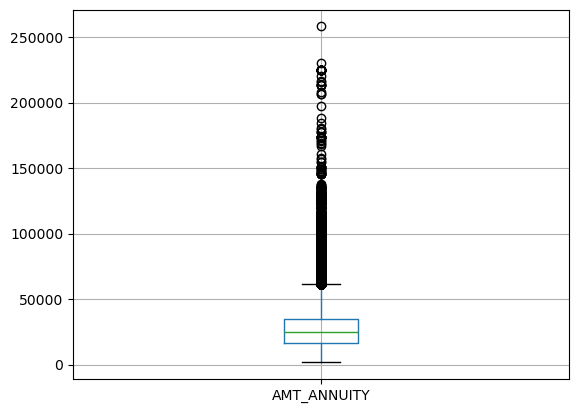

In [29]:
print(application_df.AMT_ANNUITY.describe())
application_df.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [31]:
# from box plot it seems, it has lot of outliers so considering median measure
application_df.AMT_ANNUITY.median()

24903.0

we can impute 24903(median) value in place of missing values

In [33]:
application_df.AMT_ANNUITY=application_df.AMT_ANNUITY.fillna(application_df.AMT_ANNUITY.median())

In [35]:
application_df.AMT_ANNUITY.isnull().sum()

0

#### AMT_GOODS_PRICE

In [37]:
#AMT_GOODS_PRICE
print(application_df.AMT_GOODS_PRICE.head()) 


0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


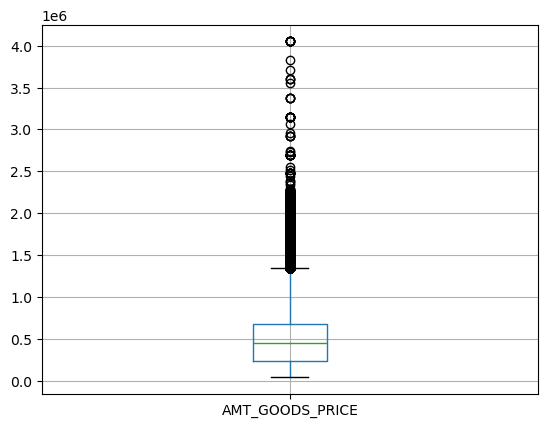

In [39]:
print(application_df.AMT_GOODS_PRICE.describe())
application_df.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

In [41]:
# from box plot it seems, it has lot of outliers so considering median value
application_df.AMT_GOODS_PRICE.median()

450000.0

 we can impute 450000.0 value in place of missing values

In [43]:
application_df.AMT_GOODS_PRICE=application_df.AMT_GOODS_PRICE.fillna(application_df.AMT_GOODS_PRICE.median())

In [45]:
application_df.AMT_GOODS_PRICE.isnull().sum()

0

#### NAME_TYPE_SUITE

In [47]:
print(application_df.NAME_TYPE_SUITE.head()) 

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [49]:
print(application_df.NAME_TYPE_SUITE.describe())

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


In [51]:
# as it is a categorical value, considering mode value to impute missing values
print(application_df.NAME_TYPE_SUITE.mode())

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


considering the value to be imputed is - Unaccompanied

In [53]:
application_df.NAME_TYPE_SUITE=application_df.NAME_TYPE_SUITE.fillna('Unaccompanied')

In [55]:
application_df.NAME_TYPE_SUITE.isnull().sum()

0

#### CNT_FAM_MEMBERS

In [57]:
print(application_df.CNT_FAM_MEMBERS.head())

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


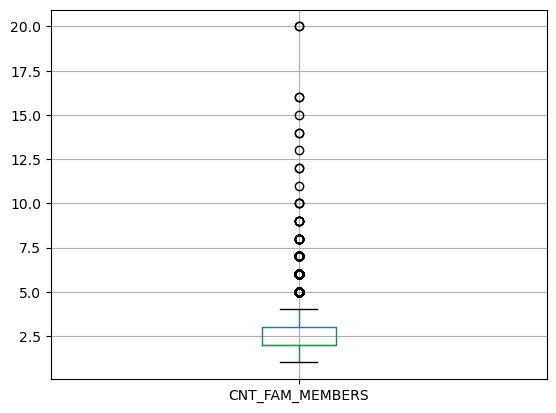

In [59]:
print(application_df.CNT_FAM_MEMBERS.describe())
application_df.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()

In [61]:
# from box plot it seems, it has lot of outliers so will consider median value
application_df.CNT_FAM_MEMBERS.median()

2.0

we can impute "2.0" value in place of missing values

In [63]:
application_df.CNT_FAM_MEMBERS=application_df.CNT_FAM_MEMBERS.fillna(application_df.CNT_FAM_MEMBERS.median())

In [65]:
application_df.CNT_FAM_MEMBERS.isnull().sum()

0

#### EXT_SOURCE_2

In [67]:
print(application_df.EXT_SOURCE_2.head())

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64


count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


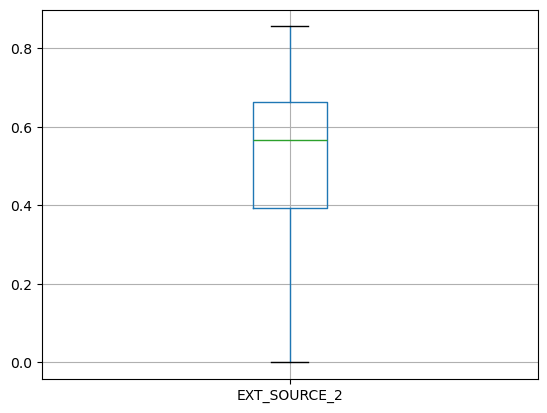

In [69]:
print(application_df.EXT_SOURCE_2.describe())
application_df.boxplot(column=['EXT_SOURCE_2'])
plt.show()

In [71]:
# by observation of box plot we can say,there is  no outliers but there is some tilt towards outliers so going with median
application_df.EXT_SOURCE_2.median()

0.5659614260608526

so,  in place of missing values 0.5659614260608526 can be imputed

In [73]:
application_df.EXT_SOURCE_2=application_df.EXT_SOURCE_2.fillna(application_df.EXT_SOURCE_2.median())

In [75]:
application_df.EXT_SOURCE_2.isnull().sum()

0

#### 'OBS_30_CNT_SOCIAL_CIRCLE'

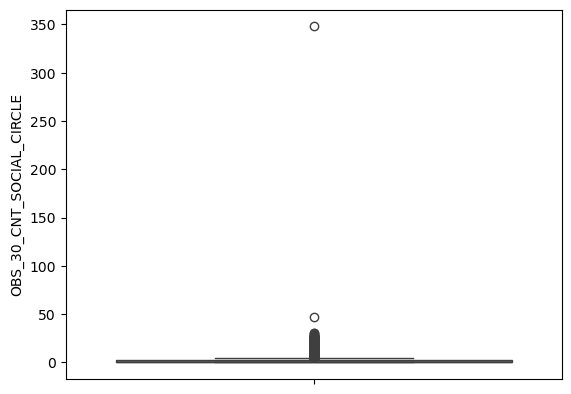

In [77]:
sns.boxplot(application_df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [79]:
application_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [81]:
#from boxplot outliers can be seen.So imputing with median
application_df.OBS_30_CNT_SOCIAL_CIRCLE=application_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application_df.OBS_30_CNT_SOCIAL_CIRCLE.median())

In [83]:
application_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### 'DEF_30_CNT_SOCIAL_CIRCLE'

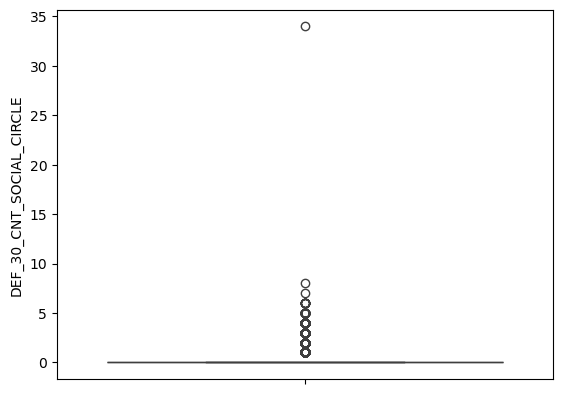

In [85]:
sns.boxplot(application_df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [87]:
application_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [89]:
# from boxplot outliers can be seen ,so imputing with median
application_df.DEF_30_CNT_SOCIAL_CIRCLE=application_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application_df.DEF_30_CNT_SOCIAL_CIRCLE.median())

In [91]:
application_df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### 'OBS_60_CNT_SOCIAL_CIRCLE'

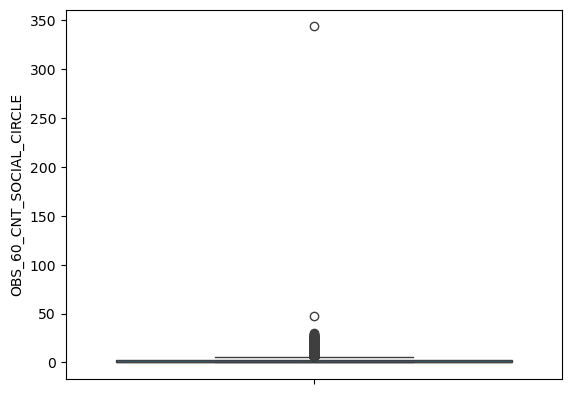

In [93]:
sns.boxplot(application_df['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [95]:
application_df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [97]:
# from boxplot outliers can be seen ,so imputing with median
application_df.OBS_60_CNT_SOCIAL_CIRCLE=application_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application_df.OBS_60_CNT_SOCIAL_CIRCLE.median())

In [99]:
application_df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### 'DEF_60_CNT_SOCIAL_CIRCLE'

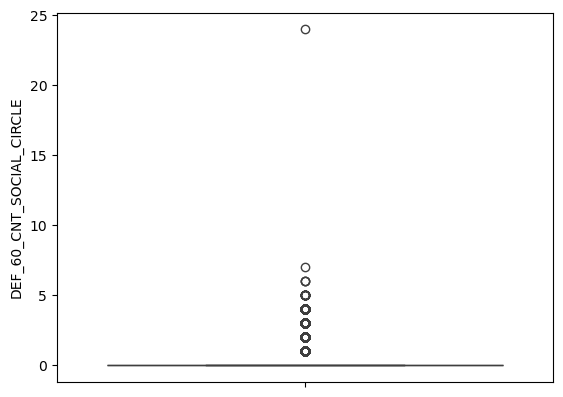

In [101]:
sns.boxplot(application_df['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [103]:
application_df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [105]:
# from boxplot outliers can be seen ,so imputing with median
application_df.DEF_60_CNT_SOCIAL_CIRCLE=application_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application_df.DEF_60_CNT_SOCIAL_CIRCLE.median())

In [107]:
application_df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

#### 'DAYS_LAST_PHONE_CHANGE'

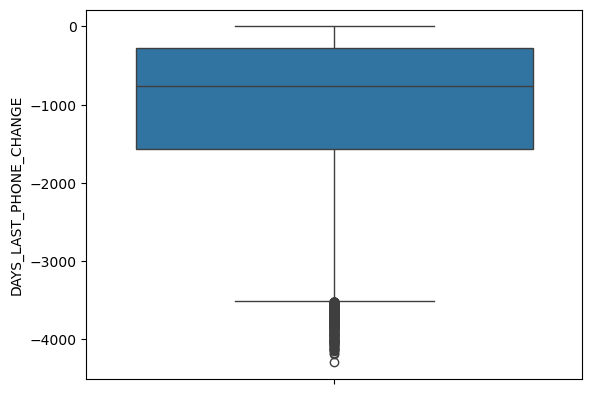

In [109]:
sns.boxplot(application_df['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [111]:
application_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [113]:
# from boxplot outliers can be seen ,so imputing with median
application_df.DAYS_LAST_PHONE_CHANGE=application_df.DAYS_LAST_PHONE_CHANGE.fillna(application_df.DAYS_LAST_PHONE_CHANGE.median())

In [115]:
application_df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [117]:
#after these missing values imputation checking for null
application_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

##### checking missing values for the column having 13% and more

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64


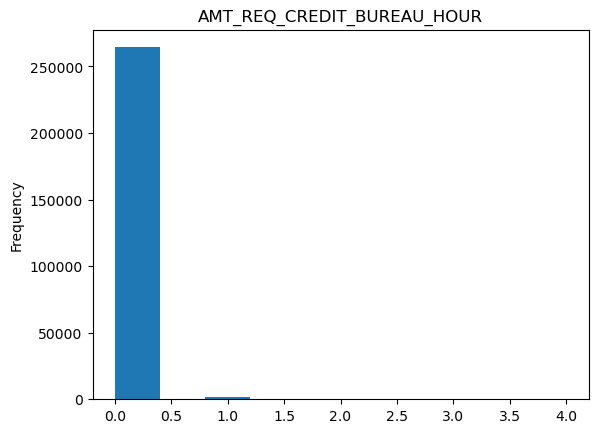

------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64


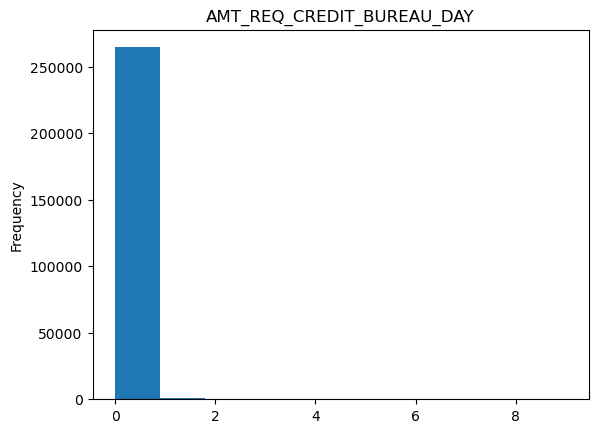

------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64


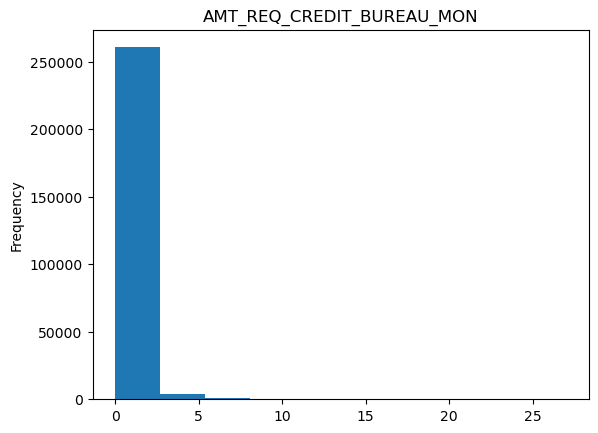

------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64


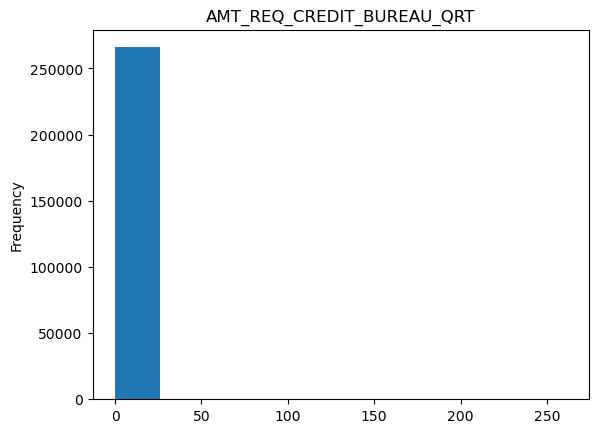

------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64


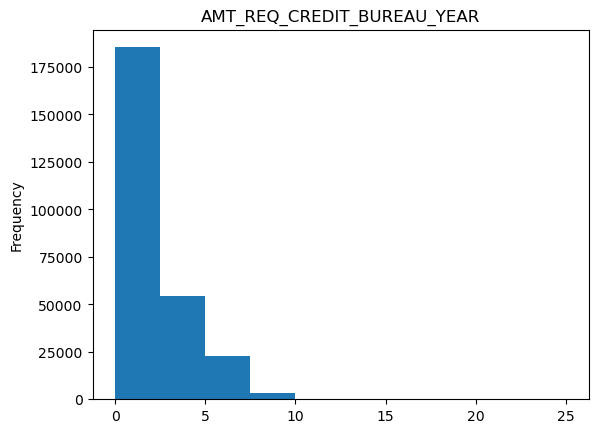

In [119]:
#AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
#AMT_REQ_CREDIT_BUREAU_DAY       13.501631
#AMT_REQ_CREDIT_BUREAU_MON       13.501631
#AMT_REQ_CREDIT_BUREAU_QRT       13.501631
#AMT_REQ_CREDIT_BUREAU_YEAR      13.501631

print(application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())
application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_HOUR')
plt.show()
print('------------------------------------------------------------------------------------')
print(application_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())
application_df['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_DAY')
plt.show()
print('------------------------------------------------------------------------------------')
print(application_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())
application_df['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_MON')
plt.show()
print('------------------------------------------------------------------------------------')
print(application_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())
application_df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_QRT')
plt.show()
print('------------------------------------------------------------------------------------')
print(application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())
application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

In [121]:
#since the above columns takes only discrete values, so  we will replace these  by mode.

In [123]:
application_df['AMT_REQ_CREDIT_BUREAU_HOUR']=application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode().iloc[0])
application_df['AMT_REQ_CREDIT_BUREAU_DAY']=application_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode().iloc[0])
application_df['AMT_REQ_CREDIT_BUREAU_MON']=application_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_df['AMT_REQ_CREDIT_BUREAU_MON'].mode().iloc[0])
application_df['AMT_REQ_CREDIT_BUREAU_QRT']=application_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])
application_df['AMT_REQ_CREDIT_BUREAU_YEAR']=application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode().iloc[0])

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


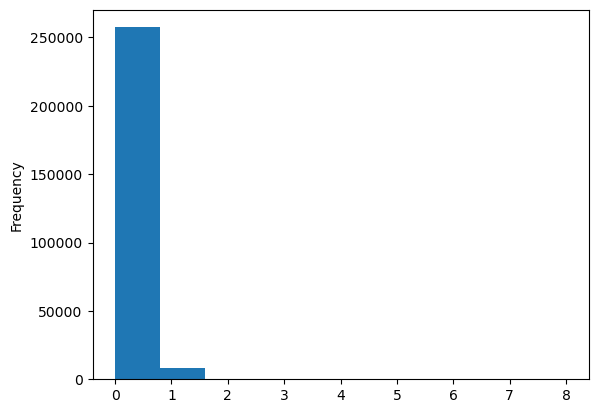

In [125]:
#AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
print(application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].head())
num_unique_values =  len(application_df.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins=num_unique_values)
plt.show()


In [127]:
#As we can see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. 
#So, we can ignore this column for analysis.

In [129]:
#after these missing values imputation checking for null %
application_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [131]:
nulls = application_df.isnull().sum()
nulls[nulls > 0]

OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
AMT_REQ_CREDIT_BUREAU_WEEK       41519
dtype: int64

#### missing value imputation of 40% and above

In [133]:
#YEARS_BEGINEXPLUATATION_AVG     48.781019
#FLOORSMAX_AVG                   49.760822
#YEARS_BEGINEXPLUATATION_MODE    48.781019
#FLOORSMAX_MODE                  49.760822
#YEARS_BEGINEXPLUATATION_MEDI    48.781019
#FLOORSMAX_MEDI                  49.760822
#TOTALAREA_MODE                  48.268517
#EMERGENCYSTATE_MODE             47.398304
print(application_df['YEARS_BEGINEXPLUATATION_AVG'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['FLOORSMAX_AVG'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['YEARS_BEGINEXPLUATATION_MODE'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['FLOORSMAX_MODE'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['YEARS_BEGINEXPLUATATION_MEDI'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['FLOORSMAX_MEDI'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['TOTALAREA_MODE'].describe())
print('------------------------------------------------------------------------------------')
print(application_df['EMERGENCYSTATE_MODE'].describe())

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
------------------------------------------------------------------------------------
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64
------------------------------------------------------------------------------------
count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64
------------------------------------------------------------------------------------
count    154491.000000
mean          0.222315
std       

In [135]:
# [YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE]
# since these column don't have outliers,i.e these normally distributed .so will impute these with mean.
application_df['YEARS_BEGINEXPLUATATION_AVG']=application_df['YEARS_BEGINEXPLUATATION_AVG'].fillna(application_df['YEARS_BEGINEXPLUATATION_AVG'].mean())
application_df['FLOORSMAX_AVG']=application_df['FLOORSMAX_AVG'].fillna(application_df['FLOORSMAX_AVG'].mean())
application_df['YEARS_BEGINEXPLUATATION_MODE']=application_df['YEARS_BEGINEXPLUATATION_MODE'].fillna(application_df['YEARS_BEGINEXPLUATATION_MODE'].mean())
application_df['YEARS_BEGINEXPLUATATION_MEDI']=application_df['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application_df['YEARS_BEGINEXPLUATATION_MEDI'].mean())
application_df['FLOORSMAX_MEDI']=application_df['FLOORSMAX_MEDI'].fillna(application_df['FLOORSMAX_MEDI'].mean())
application_df['FLOORSMAX_MODE']=application_df['FLOORSMAX_MODE'].fillna(application_df['FLOORSMAX_MODE'].mean())
application_df['TOTALAREA_MODE']=application_df['TOTALAREA_MODE'].fillna(application_df['TOTALAREA_MODE'].mean())

In [137]:
#EMERGENCYSTATE_MODE
#imputing this column with mode
application_df['EMERGENCYSTATE_MODE']=application_df['EMERGENCYSTATE_MODE'].fillna(application_df['EMERGENCYSTATE_MODE'].mode().iloc[0])

In [139]:
nulls = application_df.isnull().sum()
nulls[nulls > 0]

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_WEEK    41519
dtype: int64

In [141]:
#### EXT_SOURCE_3 
application_df.EXT_SOURCE_3.value_counts()
application_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [143]:
#since it has normal distribution ,imputing with mean
application_df['EXT_SOURCE_3']=application_df['EXT_SOURCE_3'].fillna(application_df['EXT_SOURCE_3'].mean())

#### OCCUPATION_TYPE

In [145]:
application_df.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [147]:
#As we can see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. 
#So, it would be appropriate to remove this column, but if we go through this column, this seems to look important. 
#So, we will not analyse this column.

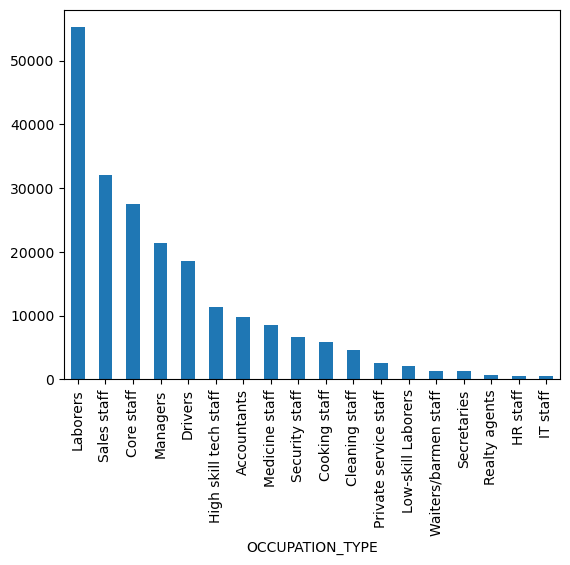

In [149]:
application_df.OCCUPATION_TYPE.value_counts().plot.bar()
plt.show()

In [151]:
#It would not be a good idea to fill the missing values with the mode of the column
# Therefore, I am not filling the missing values in this column.

In [153]:
# after these data cleaning checkin g for null
application_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [155]:
# all missing values are imputed ,only AMT_REQ_CREDIT_BUREAU_WEEK and OCCUPATION_TYPE are not imputed as in OCCUPATION_TYPE
#most of the people are laborers and it won't be good idea to impute and AMT_REQ_CREDIT_BUREAU_WEEK having no variation .so we will not analysis these.

#### Handling incorrect data/unknown value/XNA value

#### CODE_GENDER column

In [157]:
application_df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [159]:
#replacing the XNA values with mode (F) as it is a categorical column
application_df['CODE_GENDER'] = application_df['CODE_GENDER'].replace('XNA', 'F')
application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

#### NAME_FAMILY_STATUS column

In [161]:
application_df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [163]:
# replacing unknown value with Married
application_df['NAME_FAMILY_STATUS'] = application_df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')
application_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

#### ORGANIZATION_TYPE

In [165]:
application_df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [167]:
#replacing XNA with 'MISSING'
application_df['ORGANIZATION_TYPE'] = application_df['ORGANIZATION_TYPE'].replace('XNA', 'MISSING')
application_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
MISSING                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

##### checking the datatypes & change the datatype like change  negative age and negative date to positive

In [169]:
# checking the datatypes of columns and changing their datatype like changing  negative age to positive age and date
print(application_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [171]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
# finding count of unique values in each column
print(application_df.nunique().sort_values())

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [175]:
# converting  DAYS_BIRTH value to positive value
application_df['DAYS_BIRTH']=application_df['DAYS_BIRTH'].abs()
# converting DAYS_EMPLOYED value to positive value
application_df['DAYS_EMPLOYED']=application_df['DAYS_EMPLOYED'].abs()
# converting DAYS_REGISTRATION value to positive value
application_df['DAYS_REGISTRATION']=application_df['DAYS_REGISTRATION'].abs()
# converting  DAYS_ID_PUBLISH value to positive value
application_df['DAYS_ID_PUBLISH']=application_df['DAYS_ID_PUBLISH'].abs()
# converting  DAYS_LAST_PHONE_CHANGE value to positive value
application_df['DAYS_LAST_PHONE_CHANGE']=application_df['DAYS_LAST_PHONE_CHANGE'].abs()
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### conversion of columns integer to categorical

In [177]:
# conversion of columns integer to categorical
for col in application_df.columns:
    if application_df[col].nunique() <= 3: # here considering columns with 3 unique values as categorical variables
        application_df[col] = application_df[col].astype(object)

application_df.info() 
application_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


we checked columns with unique count greater than 3 to see if any int/float column is
worngly read as object, butwe did not found  any such column .

In [179]:
# Categorical columns are:
cat_col = list(set(application_df.columns) - set(application_df.describe().columns)) 
cat_col

['LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_9',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_12',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_3',
 'FLAG_EMP_PHONE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT',
 'NAME_HOUSING_TYPE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_5',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_6',
 'TARGET',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_11',
 'CODE_GENDER',
 'FLAG_DOCUMENT_14',
 'NAME_FAMILY_STATUS',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_15',
 'NAME_EDUCATION_TYPE',
 'FLAG_WORK_PHONE',
 'FLAG_DOCUMENT_8',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_20',
 'FLAG_CONT_MOBILE',
 'NAME_CONTRACT_TYPE',
 'R

In [181]:
# Numerical columns are:
num_col = application_df.describe().columns
num_col

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### For further analysis we will use  important columns

#### For numerical columns checking for outliers and reporting them for  5 variables. 

#### CNT_CHILDREN

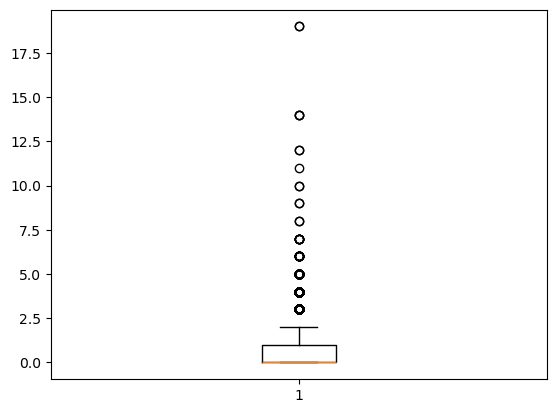

In [183]:
plt.boxplot(application_df['CNT_CHILDREN'])
plt.show()

In [185]:
# From box plot, we can say that there exists values which are above upper whisker(maximum) considered to be  outliers. 
Q1 = application_df['CNT_CHILDREN'].quantile(0.25)
Q3 = application_df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
Lowerwhisker=(Q1 - 1.5 * IQR)
Upperwhisker=(Q3 + 1.5 * IQR)
# in plot outliers are present only above the upper wisker so considering them as outliers
#from plot we can see some values greater than 10. As having 10 children is not possible ,so this column having outlier.

#### AMT_CREDIT

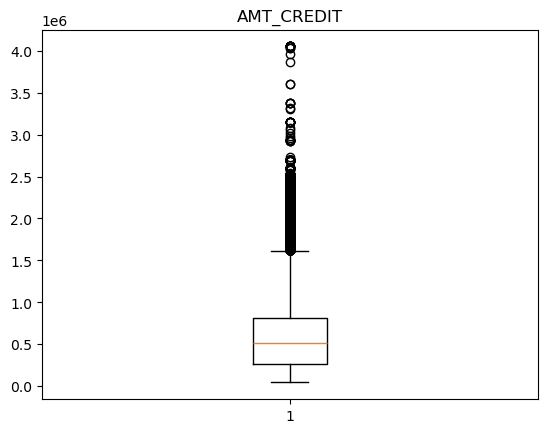

In [187]:
plt.boxplot(application_df['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

In [189]:
 Q1 = application_df['AMT_CREDIT'].quantile(0.25)
Q3 = application_df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
Lowerwhisker=(Q1 - 1.5 * IQR)
Upperwhisker=(Q3 + 1.5 * IQR)
print('Lowerwhisker :',Lowerwhisker)
print('Upperwhisker :',Upperwhisker)

Lowerwhisker : -537975.0
Upperwhisker : 1616625.0


In [191]:
# the values above the Upper whisker and below the lower whisker are  outliers
# In Boxplot  outliers  present only above the Upper wisker so we can consider them as outliers
#We can consider the amount credited greater than 1616625.0 as an outlier

In [193]:
application_df['AMT_CREDIT'].describe()


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [195]:
application_df['AMT_CREDIT'].max()

4050000.0

#### AMT_ANNUITY

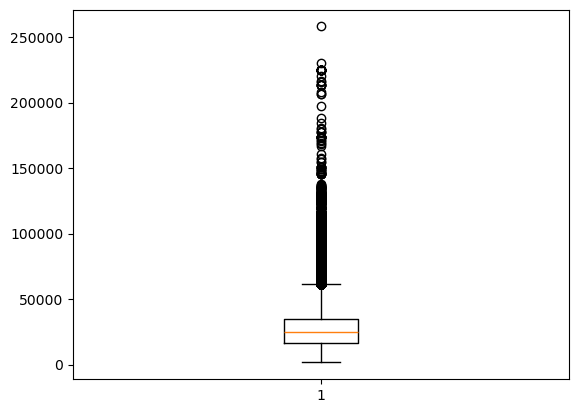

In [197]:
data=application_df['AMT_ANNUITY']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

In [199]:
# From box plot, we can say that the  values which are above Upper Whisker(maximum) considered  as outliers. 
Q1 = application_df['AMT_ANNUITY'].quantile(0.25)
Q3 = application_df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
Lowerwhisker=(Q1 - 1.5 * IQR)
Upperwhisker=(Q3 + 1.5 * IQR)
print('lowerwhisker :',Lowerwhisker)
print('upperwhisker :',Upperwhisker)

lowerwhisker : -10584.0
upperwhisker : 61704.0


In [201]:
# As the Box-plot shows the outliers are present only above the Upper wisker . 
#as amount can't be negative ,so we can consider amount greater than  61704.0 is an outlier
#We can say value more than 61704.0 is an outlier

#### REGION_POPULATION_RELATIVE

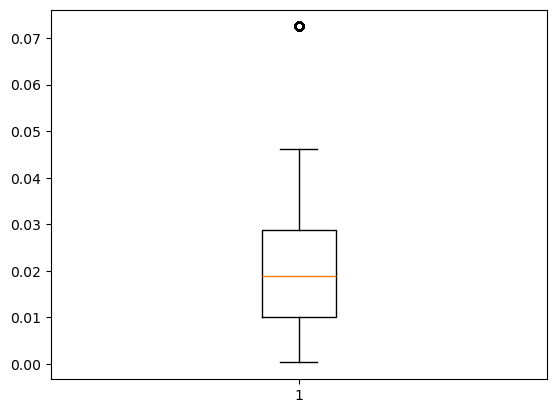

In [203]:
plt.boxplot(application_df['REGION_POPULATION_RELATIVE'])
plt.show()

In [205]:
# From box plot, we can say that values which are above upper whisker(maximum) are outliers. 
Q1 = application_df['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = application_df['REGION_POPULATION_RELATIVE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
print('lowerwhisker :',lowerwhisker)
print('upperwhisker :',upperwhisker)

lowerwhisker : -0.017979500000000002
upperwhisker : 0.056648500000000004


In [207]:
#In plot outliers can be seen  only above the upper wisker so considering them as outliers
#we can say that Population Relative Count more than 0.056648500000000004 is  Outlier

#### AMT_GOODS_PRICE

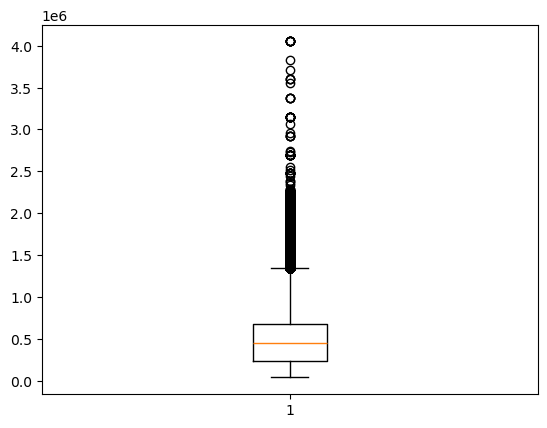

In [209]:
data=application_df['AMT_GOODS_PRICE']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

In [211]:
 
Q1 = application_df['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_df['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
print('lowerwhisker :',lowerwhisker)
print('upperwhisker :',upperwhisker)

lowerwhisker : -423000.0
upperwhisker : 1341000.0


In [213]:
#value greater than 1341000 can be an outlier

In [215]:
application_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

##### Binning of continuous variables.Checking if we need to bin any variable in different categories.Doing this for  2 variables

#### AMT_INCOME_TOTAL

In [217]:
q1=application_df['AMT_INCOME_TOTAL'].quantile(0.25)
q2=application_df['AMT_INCOME_TOTAL'].quantile(0.50)
q3=application_df['AMT_INCOME_TOTAL'].quantile(0.75)
m=application_df['AMT_INCOME_TOTAL'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data 
application_df['AMT_INCOME_TOTAL_bin'] = pd.cut(application_df['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(application_df.AMT_INCOME_TOTAL_bin.value_counts())

AMT_INCOME_TOTAL_bin
medium    82213
High      71538
Low       53182
Name: count, dtype: int64


####  AMT_CREDIT

In [219]:
q1=application_df['AMT_CREDIT'].quantile(0.25)
q2=application_df['AMT_CREDIT'].quantile(0.50)
q3=application_df['AMT_CREDIT'].quantile(0.75)
m=application_df['AMT_CREDIT'].max()

#  AMT_CREDIT will be binned into AMT_CREDIT_bin.We will do this, so that we don't loose data and we have binned values of this column
application_df['AMT_CREDIT_bin'] = pd.cut(application_df['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(application_df.AMT_CREDIT_bin.value_counts())

AMT_CREDIT_bin
medium    77786
High      75876
Low       75428
Name: count, dtype: int64


## Analysis

In [221]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


### Checking the imbalance percentage.

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64


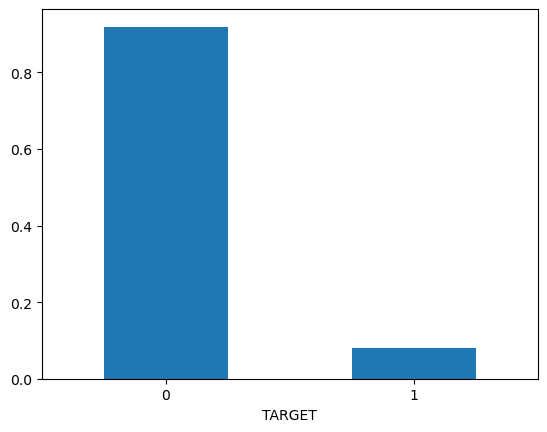

In [223]:
print(100*application_df.TARGET.value_counts()/ len(application_df))
(application_df.TARGET.value_counts()/ len(application_df)).plot.bar()
plt.xticks(rotation=0)
plt.show()

In application_df there exists 91.927118% of "not default" and 8.072882% of "default" customers.So we can say this is not a balanced data set

#### Dividing the data into two segments(sets):- Target-1 and Target-0

In [225]:
application_df_1 = application_df[application_df['TARGET']==1]
application_df_0 = application_df[application_df['TARGET']==0]

#### Performing univariate analysis

#### Perfeorming analysis for both set

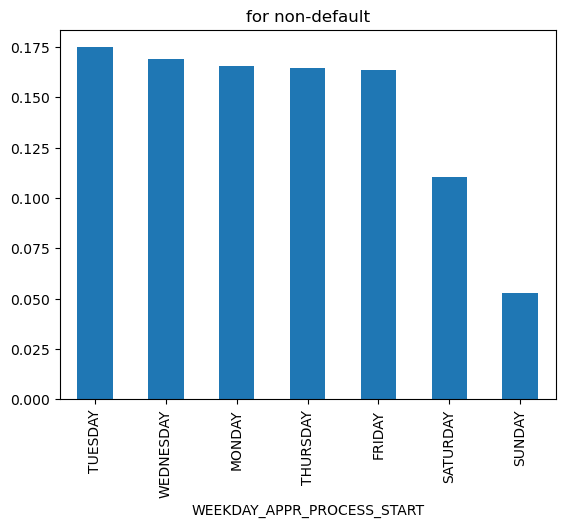

In [227]:
# WEEKDAY_APPR_PROCESS_START (categorical ordered variable)
# for TARGET=0
application_df_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

from the graph it can be concluded that application starting processes will be less in saturday & sunday.

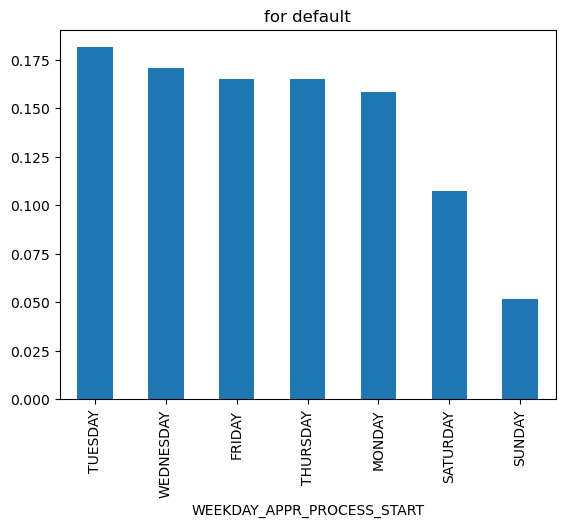

In [229]:
# for TARGET=1
application_df_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

from the above graph it can be conclude that application starting processes are  less in saturday & sunday.

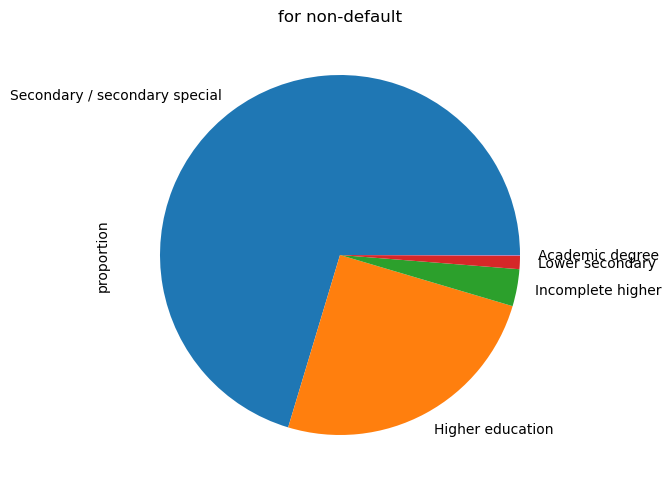

In [231]:
# NAME_EDUCATION_TYPE (categorical ordered variable)
# for Target=0
application_df_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()

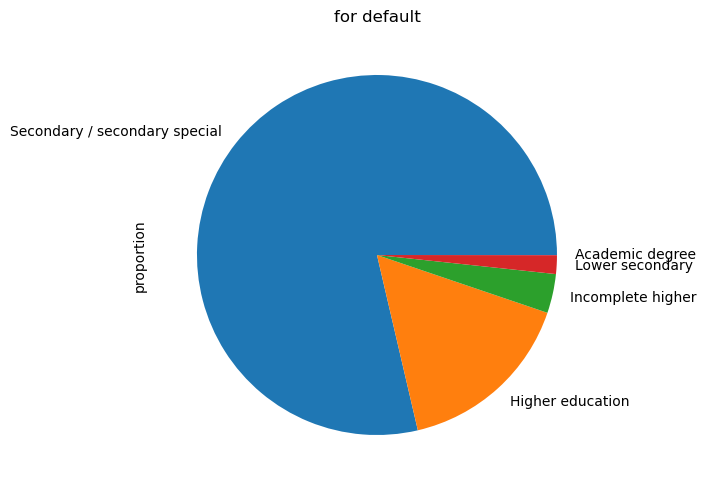

In [233]:
# for Target=1
application_df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for default')
plt.show()

from the plot above, It can be concluded that secondary/special educated people are more applying for loans .
and Academic degree educated people are less applying for loan .
for both target= 0 and 1

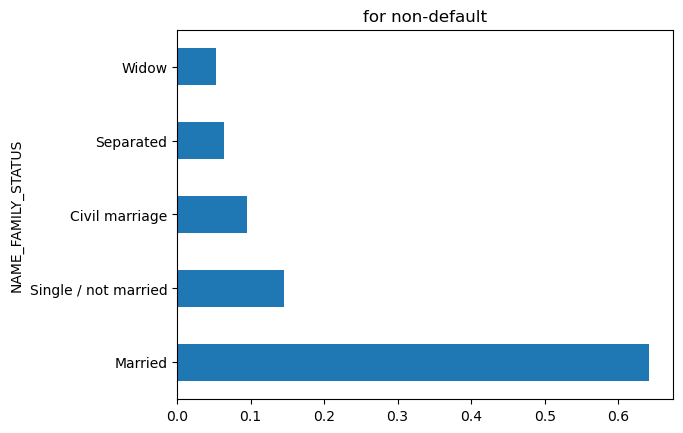

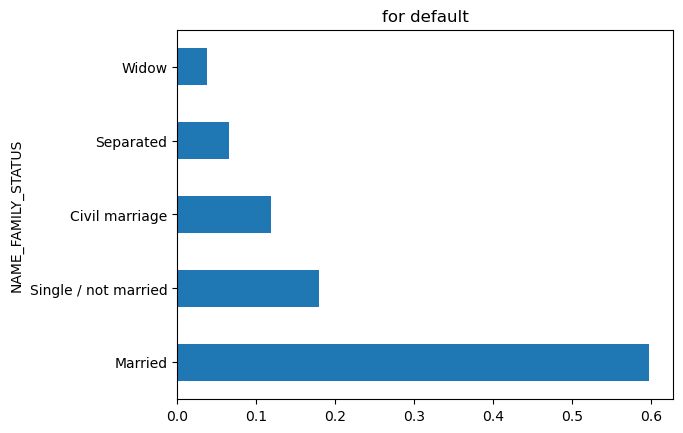

In [235]:
# NAME_FAMILY_STATUS 
# for TARGET=0
application_df_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()
# for TARGET=1
application_df_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

#the order of both the cases (defaulters and non- defaulters) is same .


#It can be said that married people take more Loan as compaired to the other categories.
#It can be said that being married is not impacting default and not defaulting people.

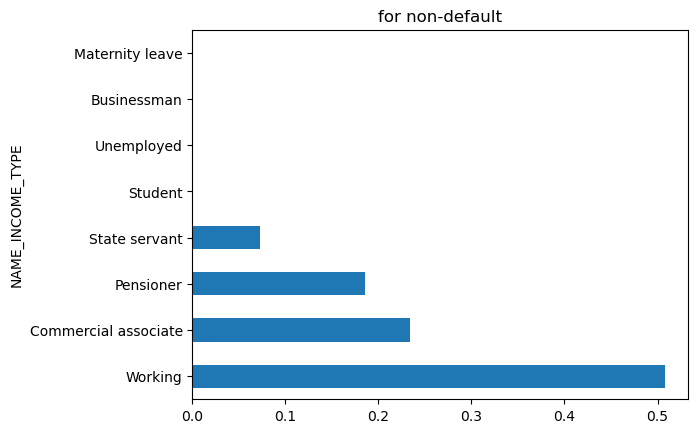

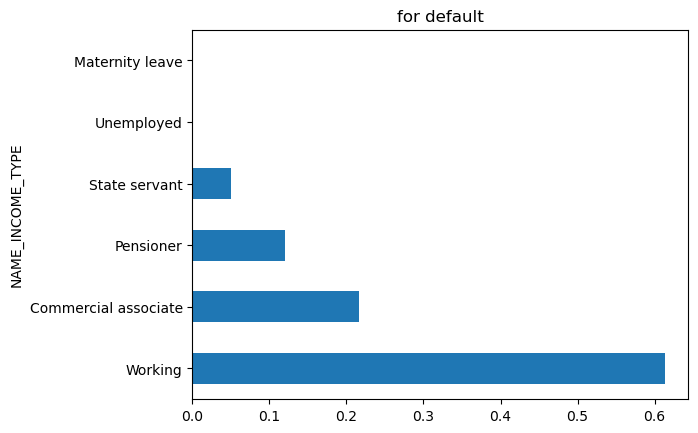

In [237]:
# NAME_INCOME_TYPE
# for TARGET=0
application_df_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()
# for TARGET=1
application_df_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

From the  graphs above , It can be concluded that
Pensioner of not default cases are more compared to Pensioner of Default Cases.
There is both, loss and profit due to Pensioners & commercial associate to the Bank.
It can also be  seen  that most of defaulter's income type is working.
& at the same time from working people there is good income to bank.

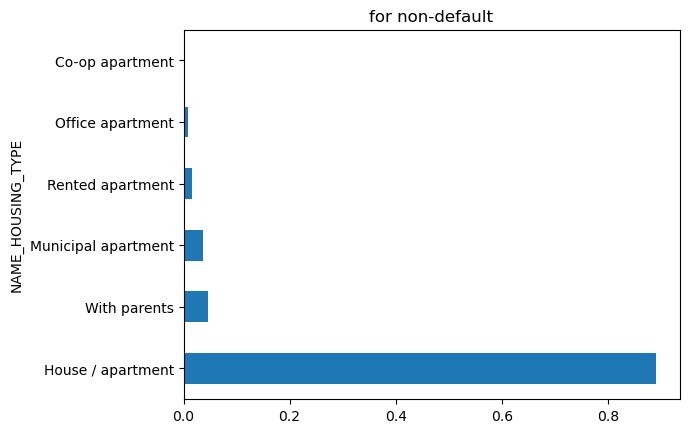

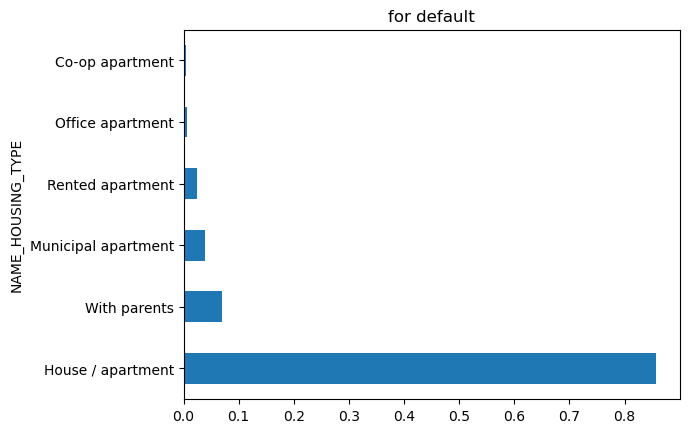

In [239]:
# NAME_HOUSING_TYPE
# for TARGET=0
application_df_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()
# for TARGET=1
application_df_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()

from graph it  can be  concluded that there exists people who have own house
lies in both defaulters and non -defaulters.

#### Compare the target variable across the categories of categorical variables against Target 0 and 1

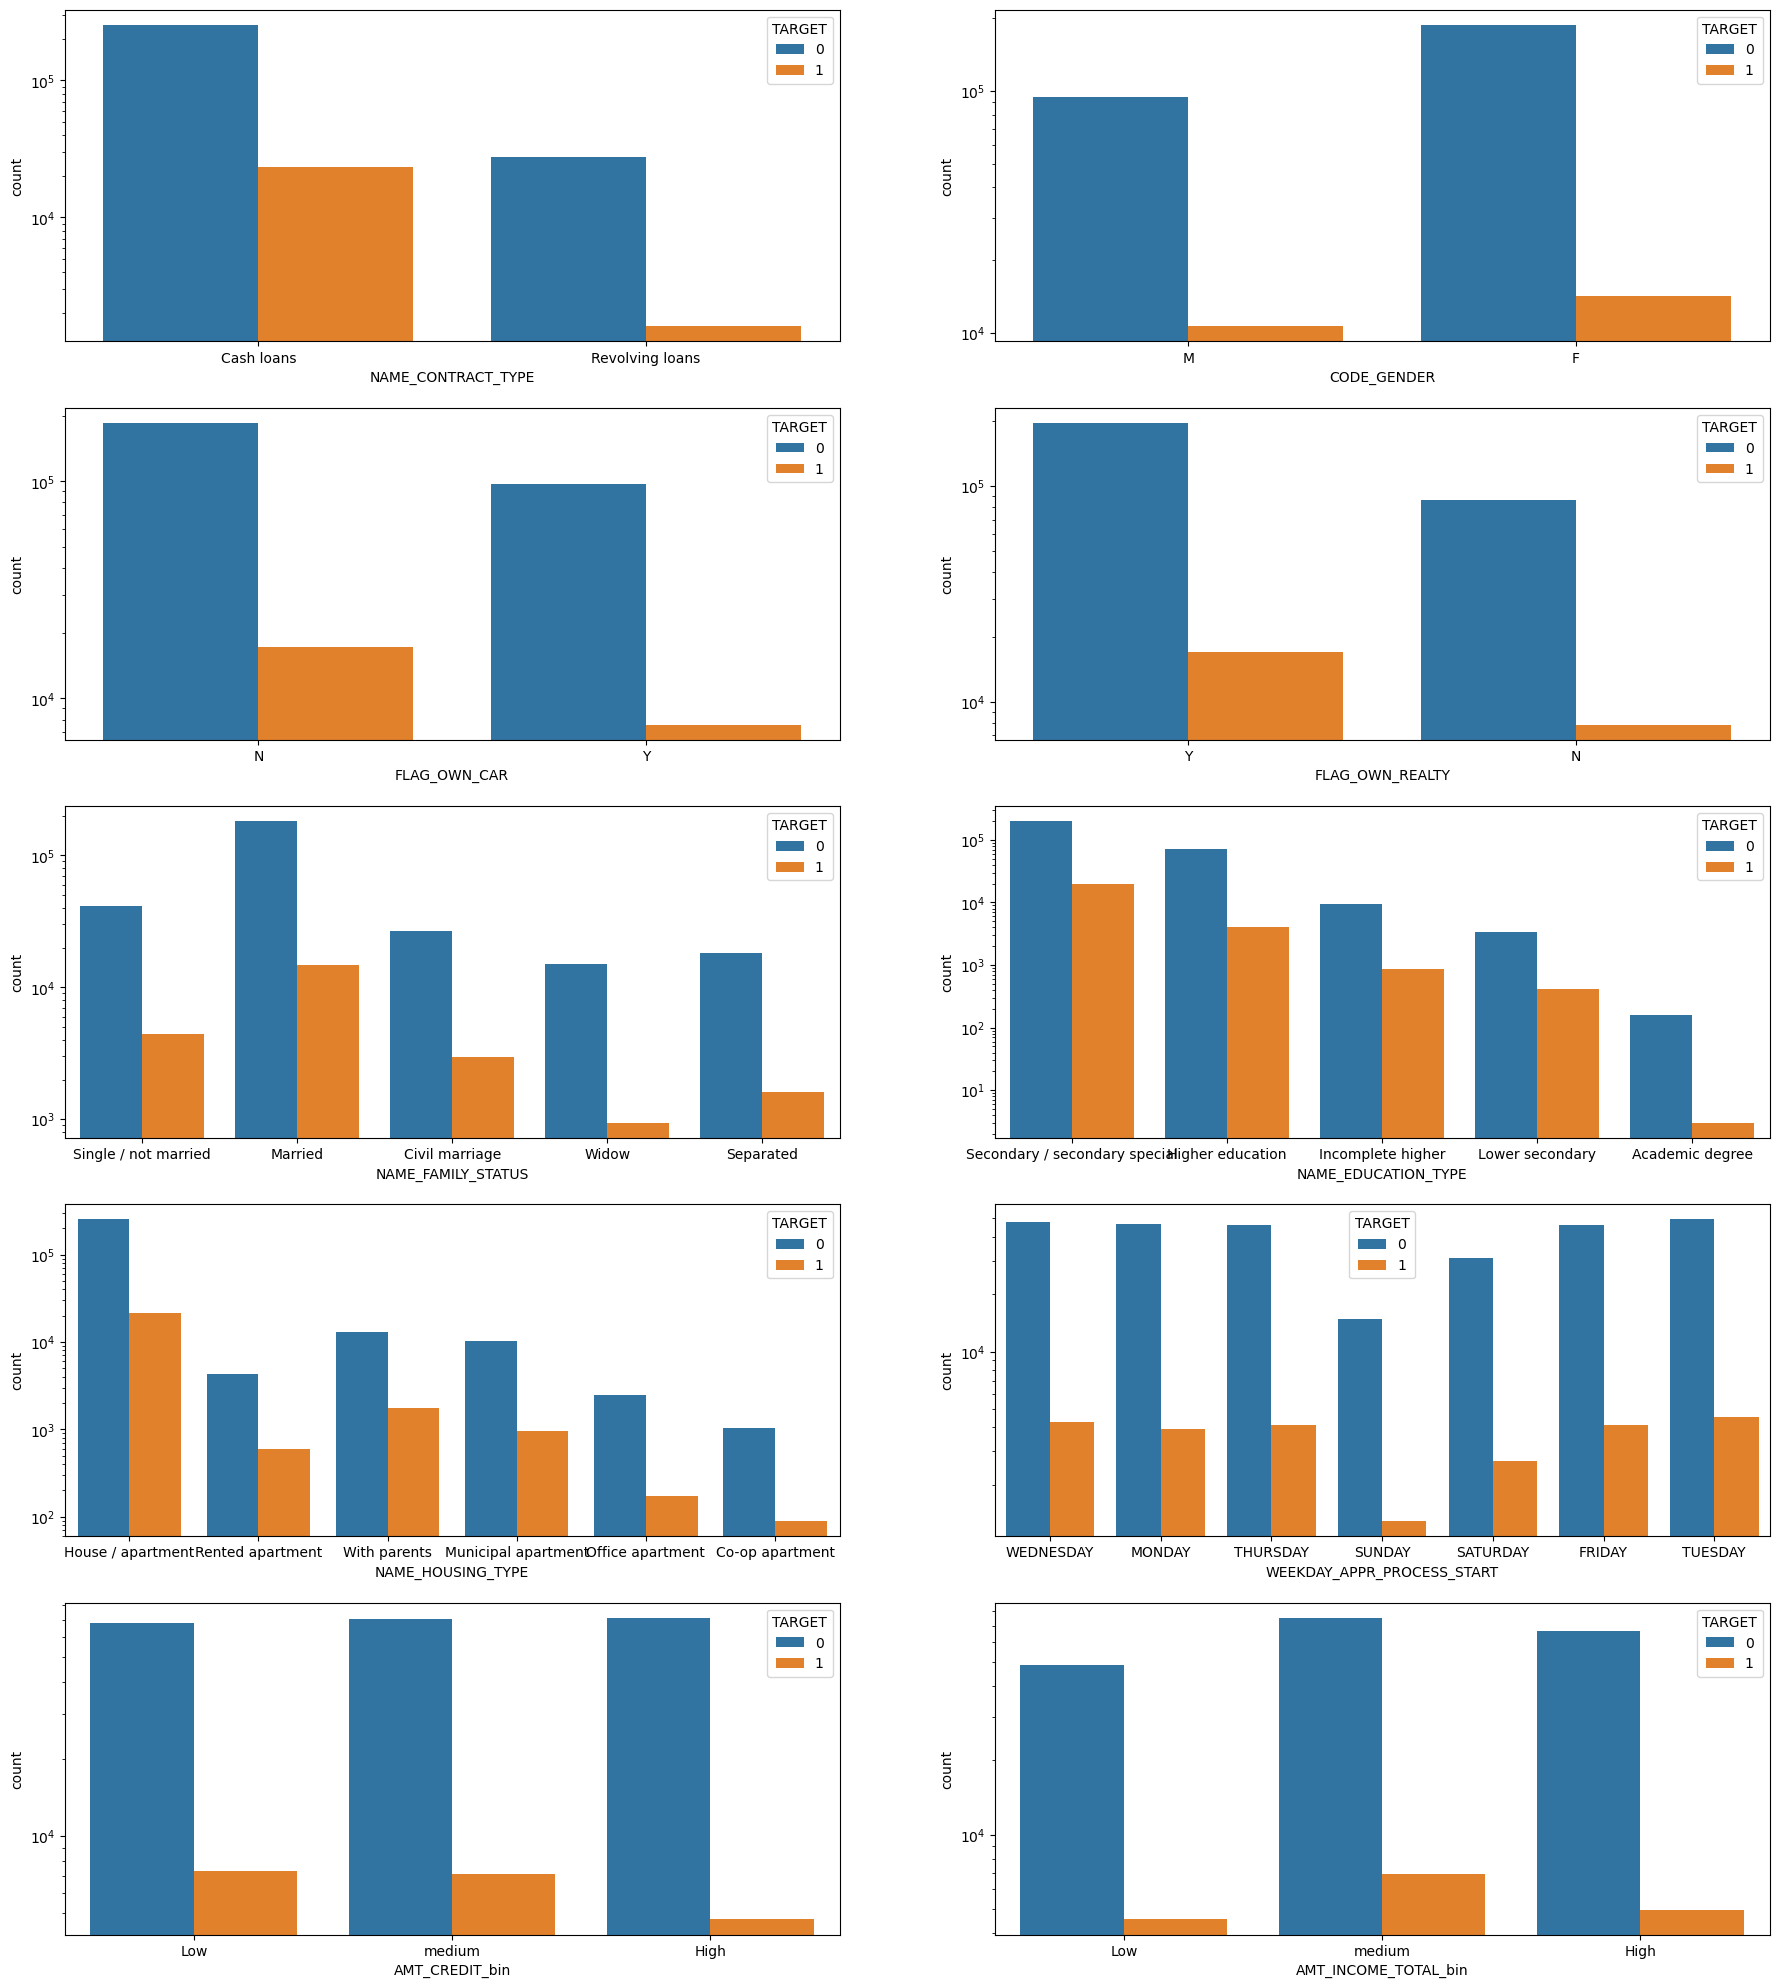

In [241]:
#considering 10 categorical columns
categorical_cols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bin','AMT_INCOME_TOTAL_bin']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_cols)):
    plt.subplot(len(categorical_cols)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=application_df)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()


#### Insights
As we can see from graphs:-

- People with Medium total income default more.

- People with high Credit amounts are less defaulters.

- People who started application process on sunday are less defaulters.

- For Bank in terms of loan applications Saturday and sunday are less busy.

- People with house or appartment take more loans than others.

- Married people  take more Loan as compared to other categories

- we can conclude that secondary/special educated people more applying for loans.

- People with real estate take  more loans.

- People who don't own a car  take more loans than others.

- Female customer take more loans.

- People take more cash loans.

#### Comparing  the target variable across the numerical variables against Target 0 and 1

C:\Users\rajga\AppData\Local\Temp\ipykernel_20252\3379817503.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\rajga\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


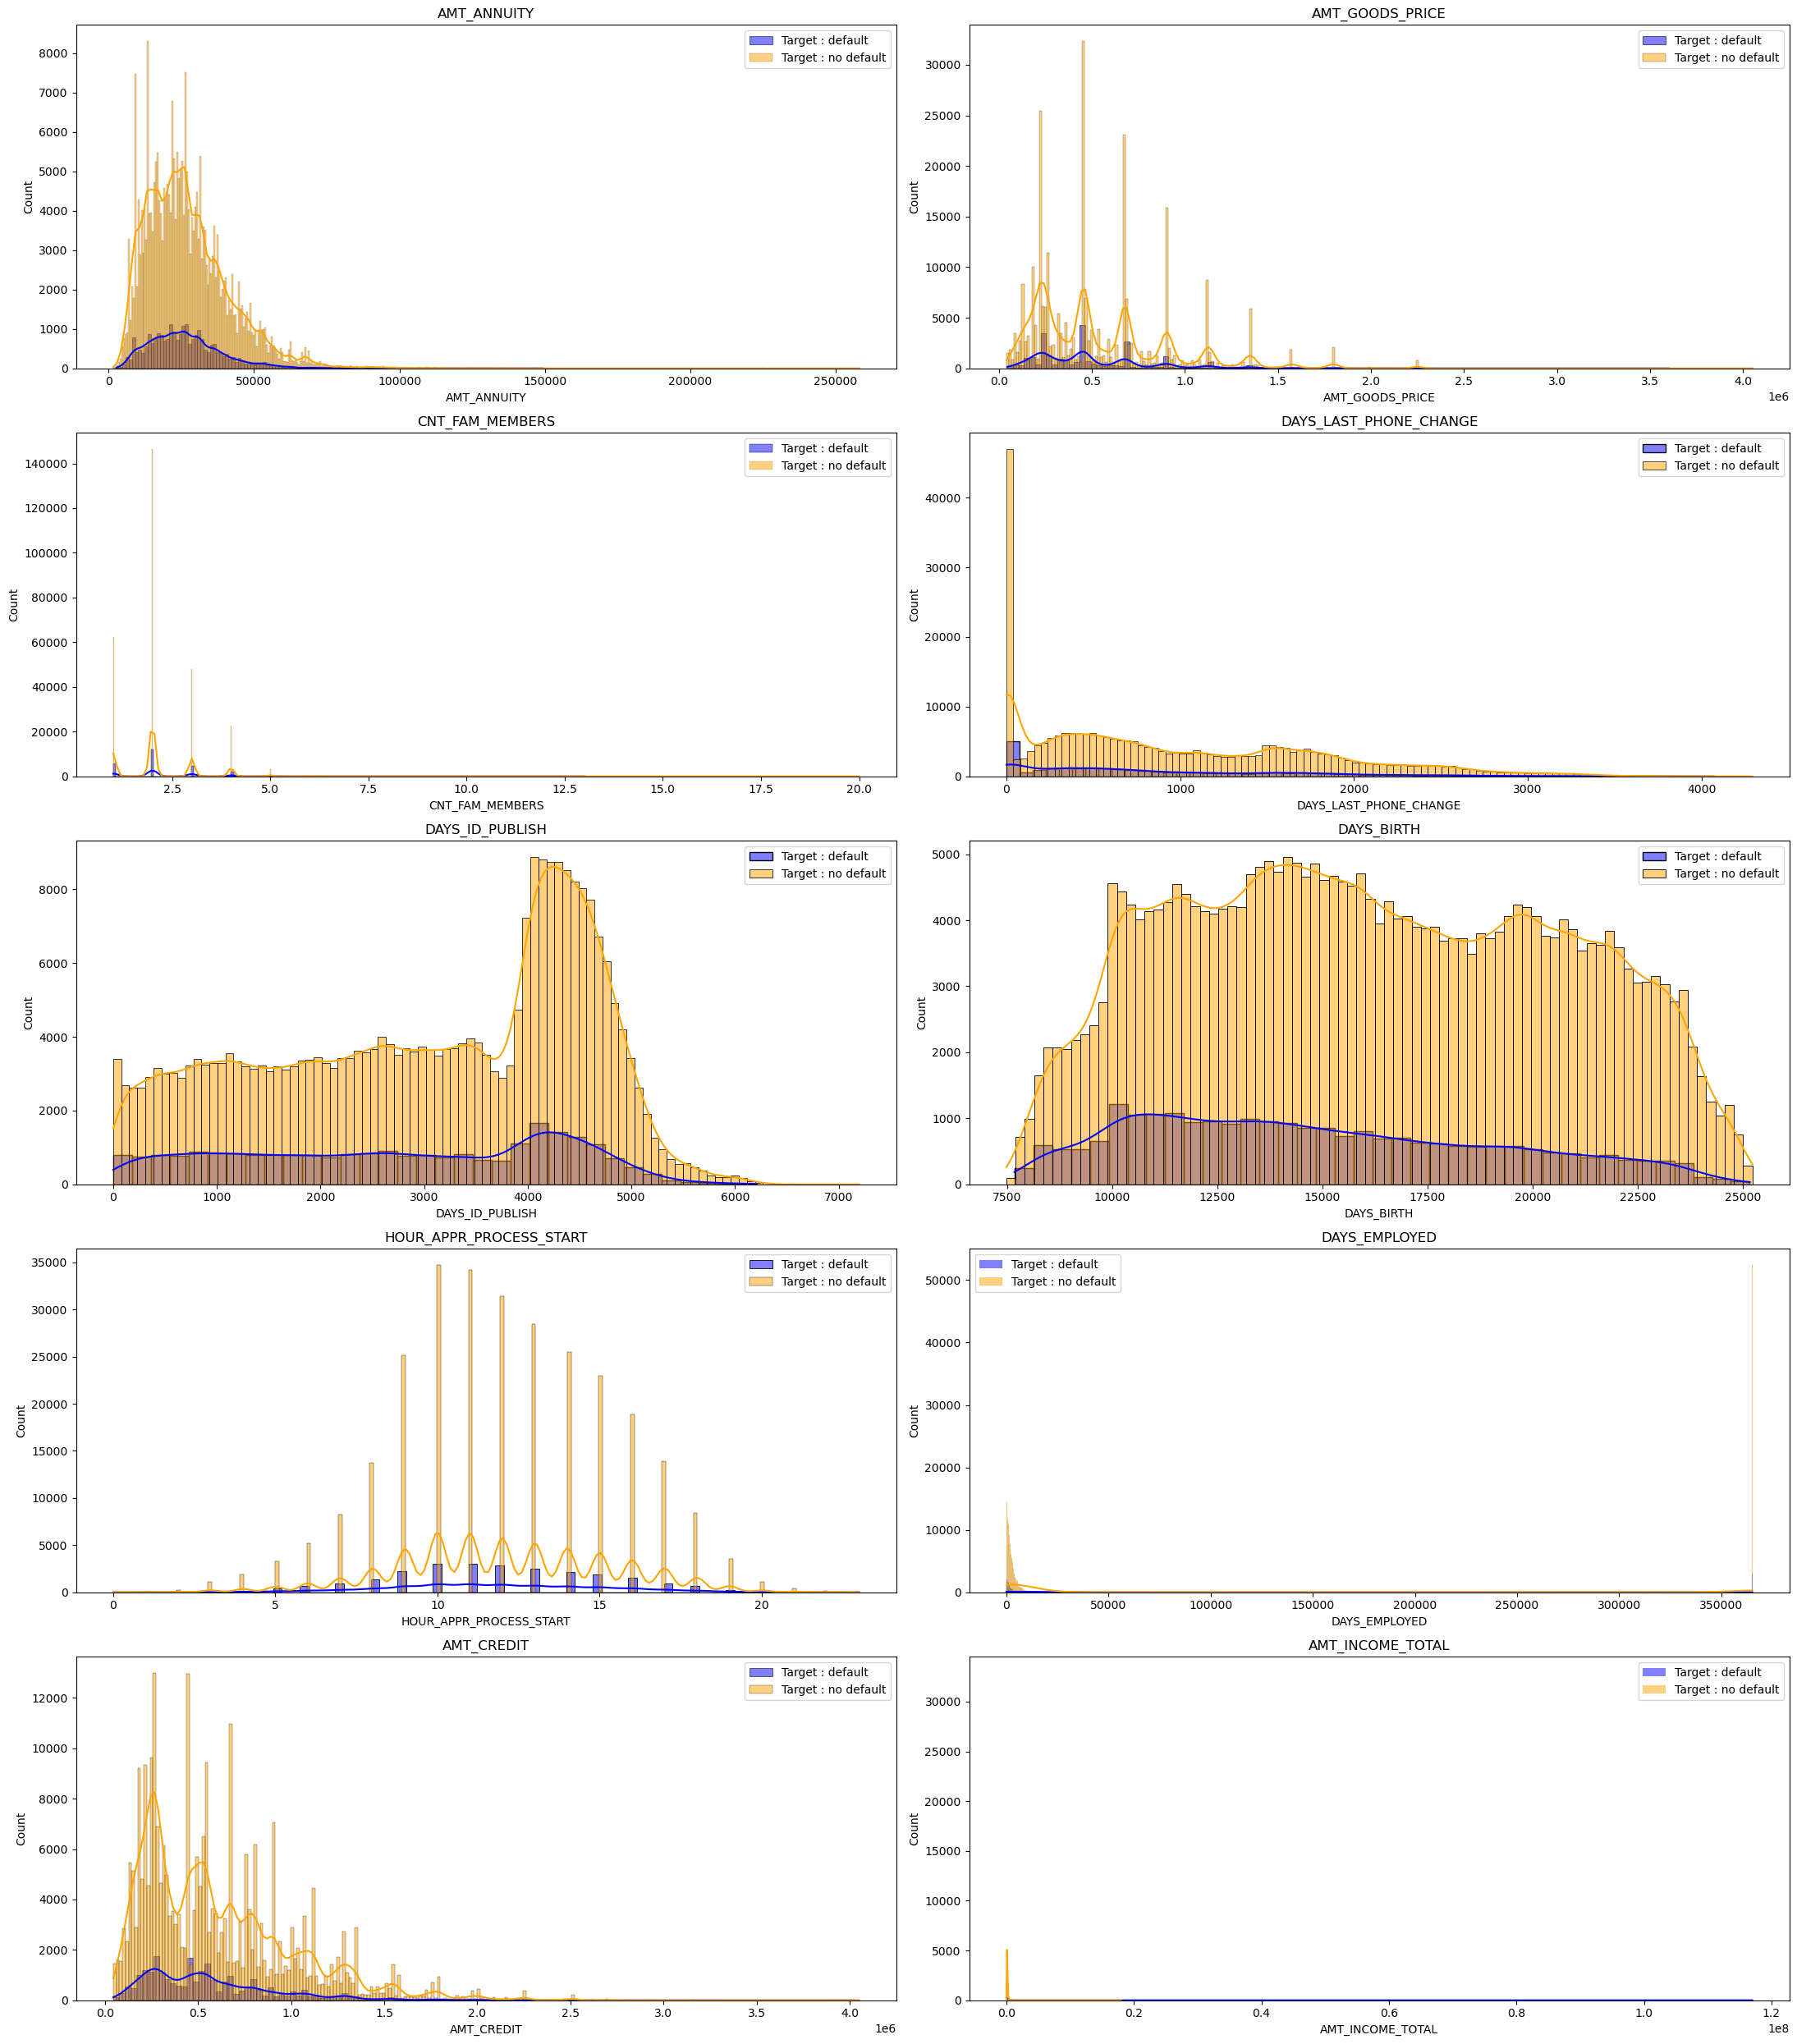

In [243]:
continous_columns = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'HOUR_APPR_PROCESS_START','DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']

plt.figure(figsize=(22, 25))
for i, col in enumerate(continous_columns):
    plt.subplot(len(continous_columns) // 2, 2, i + 1)
    sns.histplot(application_df_1[col].dropna(), kde=True, label='Target : default', color='blue')
    sns.histplot(application_df_0[col].dropna(), kde=True, label='Target : no default', color='orange')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

#### Insights
As we can see from graphs:-

- People with lower total income are more defaulters.

- People who are just  employed take more loans.

-  retired people tends to take more loans.
- During 10 AM to 2 PM more applications are filled.
- People whose age are  between 27yrs(10000-days) and 41(15000-days) yrs  take more loans.
- People whose id(s)  published between 4000 days and 5000 days  ,take more loans.
- more loans taken by nuclear family.
-  people take loans for less goods amount
- low amount annuity has higher count of loans

#### Correlation
- Finding correlation for numerical column for both cases 

In [245]:
# Select only numeric columns
numeric_data = application_df_1.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Flatten the correlation matrix and sort by values
sorted_correlation = correlation_matrix.unstack().reset_index().sort_values(by=0, ascending=False)

print(sorted_correlation)

                           level_0                       level_1         0
0                       SK_ID_CURR                    SK_ID_CURR  1.000000
578   YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE  1.000000
102                     AMT_CREDIT                    AMT_CREDIT  1.000000
136                    AMT_ANNUITY                   AMT_ANNUITY  1.000000
170                AMT_GOODS_PRICE               AMT_GOODS_PRICE  1.000000
204     REGION_POPULATION_RELATIVE    REGION_POPULATION_RELATIVE  1.000000
238                     DAYS_BIRTH                    DAYS_BIRTH  1.000000
272                  DAYS_EMPLOYED                 DAYS_EMPLOYED  1.000000
306              DAYS_REGISTRATION             DAYS_REGISTRATION  1.000000
340                DAYS_ID_PUBLISH               DAYS_ID_PUBLISH  1.000000
374                CNT_FAM_MEMBERS               CNT_FAM_MEMBERS  1.000000
408        HOUR_APPR_PROCESS_START       HOUR_APPR_PROCESS_START  1.000000
442                   EXT

In [247]:
sorted_correlation.shape

(1089, 3)

In [249]:
#there are many repeted values
#finding Top 10 Correlated values for defalut(1)
# finding correlation so that  there are no repeated values
corr=application_df_1.select_dtypes(include=['float64', 'int64']).corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.98
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


In [251]:
#finding Top 10 Correlated values for non-defalut(0)
corr=application_df_0.select_dtypes(include=['float64', 'int64']).corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
168,AMT_GOODS_PRICE,AMT_CREDIT,0.99
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


##### Correlation Observations
- for default cases, major portion of decision is taken by-
(YEARS_BEGINEXPLUATATION_MEDI AND YEARS_BEGINEXPLUATATION_AVG)
(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)
(FLOORSMAX_MEDI AND FLOORSMAX_AVG)

- for non defaulters, major portion of decision is taken by-
(FLOORSMAX_MEDI AND FLOORSMAX_AVG)
(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)


- the values - YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG are more correlated in  case of default than non-default cases.

### Performing Bi-variate analysis

In [253]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


#### Bi-variate categorical plots

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


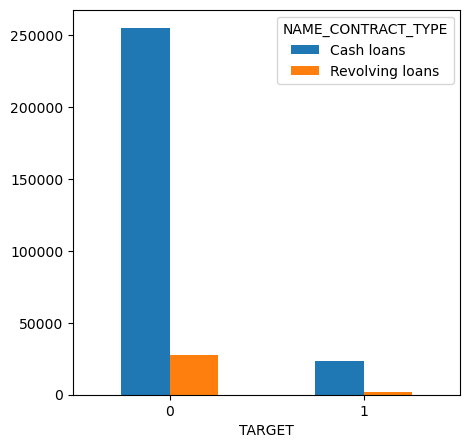

In [255]:
#Bi-variate categorical plots

table_1= pd.crosstab(index=application_df['TARGET'],columns=application_df['NAME_CONTRACT_TYPE'])
print(table_1)
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

insight-High number of cash loans than revolving loans

CODE_GENDER       F      M
TARGET                    
0            188282  94404
1             14170  10655


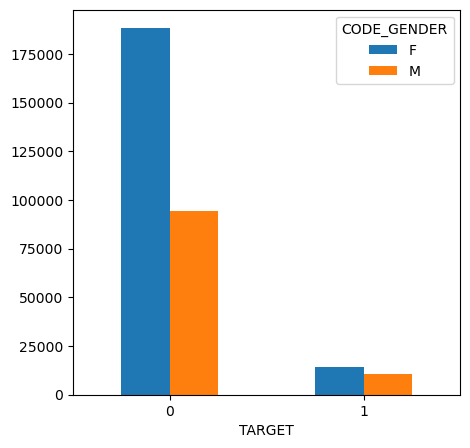

In [257]:
table_2= pd.crosstab(index=application_df['TARGET'],columns=application_df['CODE_GENDER'])
print(table_2)
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

insight-Females take more loans than others

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         229411  
1                            895          20407  


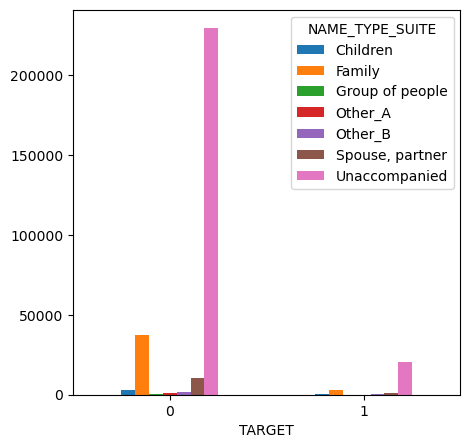

In [259]:
table_3= pd.crosstab(index=application_df['TARGET'],columns=application_df['NAME_TYPE_SUITE'])
print(table_3)
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

insight- Most of the people come alone for applying loan

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


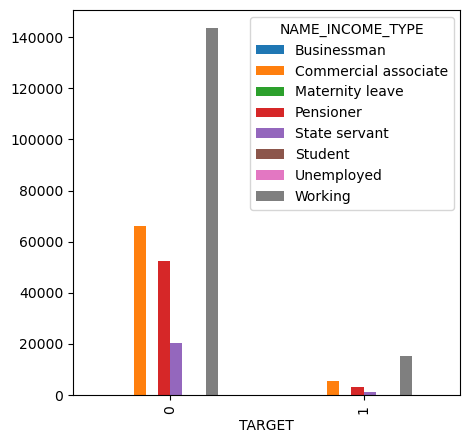

In [261]:
table_4= pd.crosstab(index=application_df['TARGET'],columns=application_df['NAME_INCOME_TYPE'])
print(table_4)
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


insight-working people take more loans than others.

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


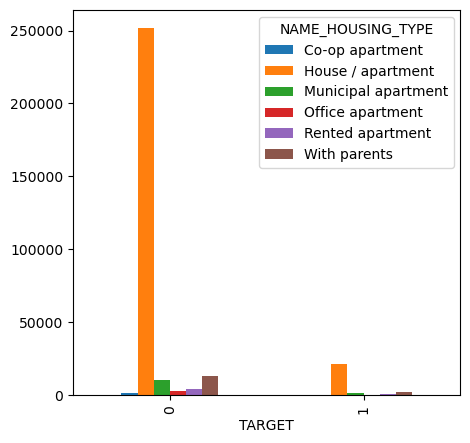

In [263]:
table_5= pd.crosstab(index=application_df['TARGET'],columns=application_df['NAME_HOUSING_TYPE'])
print(table_5)
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


insight-People who have house/appartment  take more loans than others

### Bi-variate categorical-continuous plot

In [265]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,0.0,0.0,0.0,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,No,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


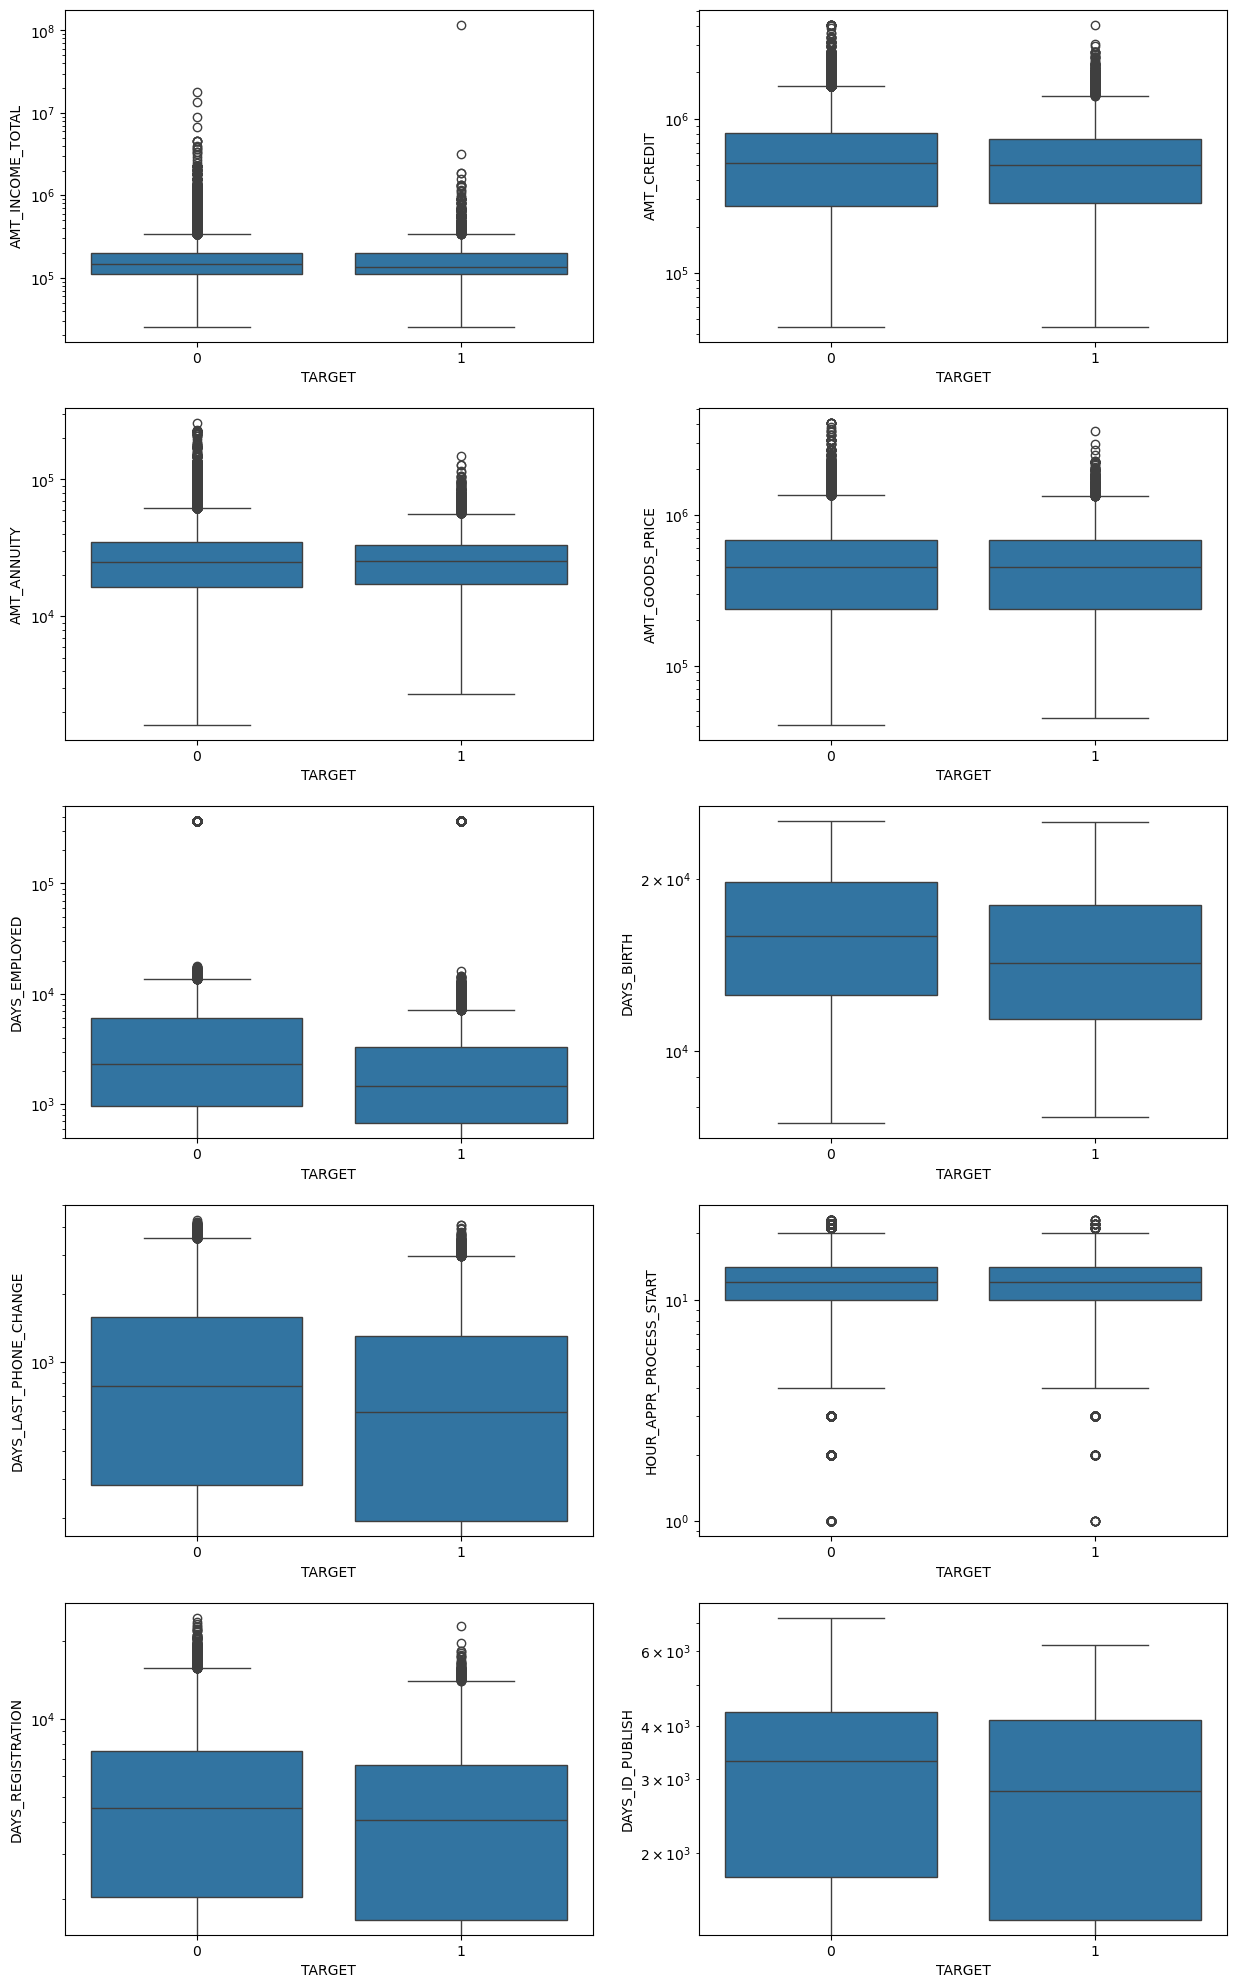

In [267]:
#bi-variate categorical-continuous plot
continous_cols=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
'DAYS_REGISTRATION','DAYS_ID_PUBLISH',]
plt.figure(figsize=(15,25))
for i in (enumerate(continous_cols)):
    plt.subplot(len(continous_cols)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=application_df[i[1]].dropna(),data=application_df)
    plt.yscale('log')
plt.show()

#### Insights
- There exists more clients who changed their their enrollment details after 4000 days of approval of loan.
- For few not default clients, time taken to publish id's are greater than default clients.
- The application process start hours taken for default and not default cases are analogous.
- In non default cases, people keep their phone numbers for greater time than default cases.
- People with greater number of days born count are less  defaulters.
- AMT_GOODS PRICE contains more outliers in non-default case than default case.
- In default cases, most of the clients amount annuity tends to be greater than median i.e.. 25000.
- Whose credit amount is greater than 50000 are less defaulters .
- people with higher no of employment days are less defaulters.
- Maximum defaulters are having less total income.

### previous_application_df data check with respect to size,data type etc,.

In [269]:
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [273]:
previous_application_df.shape

(1670214, 37)

In [275]:
previous_application_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [277]:
#checking % of null values in previous_application_df
previous_application_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [279]:
previous_application_df.columns[(previous_application_df.isnull().mean()*100)>50]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [281]:
# removing the columns having null percentage greater than 50
# AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 
previous_application_df=previous_application_df.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [283]:
# converting negative values to absolute
previous_application_df['DAYS_DECISION']=previous_application_df['DAYS_DECISION'].abs()
previous_application_df['SELLERPLACE_AREA']=previous_application_df['SELLERPLACE_AREA'].abs()
previous_application_df['DAYS_FIRST_DUE']=previous_application_df['DAYS_FIRST_DUE'].abs()
previous_application_df['DAYS_LAST_DUE_1ST_VERSION']=previous_application_df['DAYS_LAST_DUE_1ST_VERSION'].abs()
previous_application_df['DAYS_LAST_DUE']=previous_application_df['DAYS_LAST_DUE'].abs()
previous_application_df['DAYS_TERMINATION']=previous_application_df['DAYS_TERMINATION'].abs()
previous_application_df['DAYS_FIRST_DRAWING']=previous_application_df['DAYS_FIRST_DRAWING'].abs()

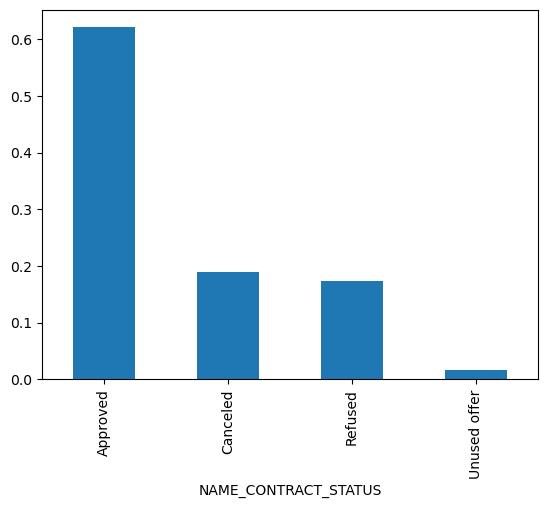

In [285]:
(previous_application_df.NAME_CONTRACT_STATUS.value_counts()/len(previous_application_df)).plot.bar()
plt.show()

### Merging application_df and previous_application_df

In [287]:
# joing the application_df and previous_application_df by  left join because we need all the rows in application data 
merged_df=pd.merge(application_df,previous_application_df,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,2636178.0,Consumer 

#### Univariate Analysis

#### Categorical analysis

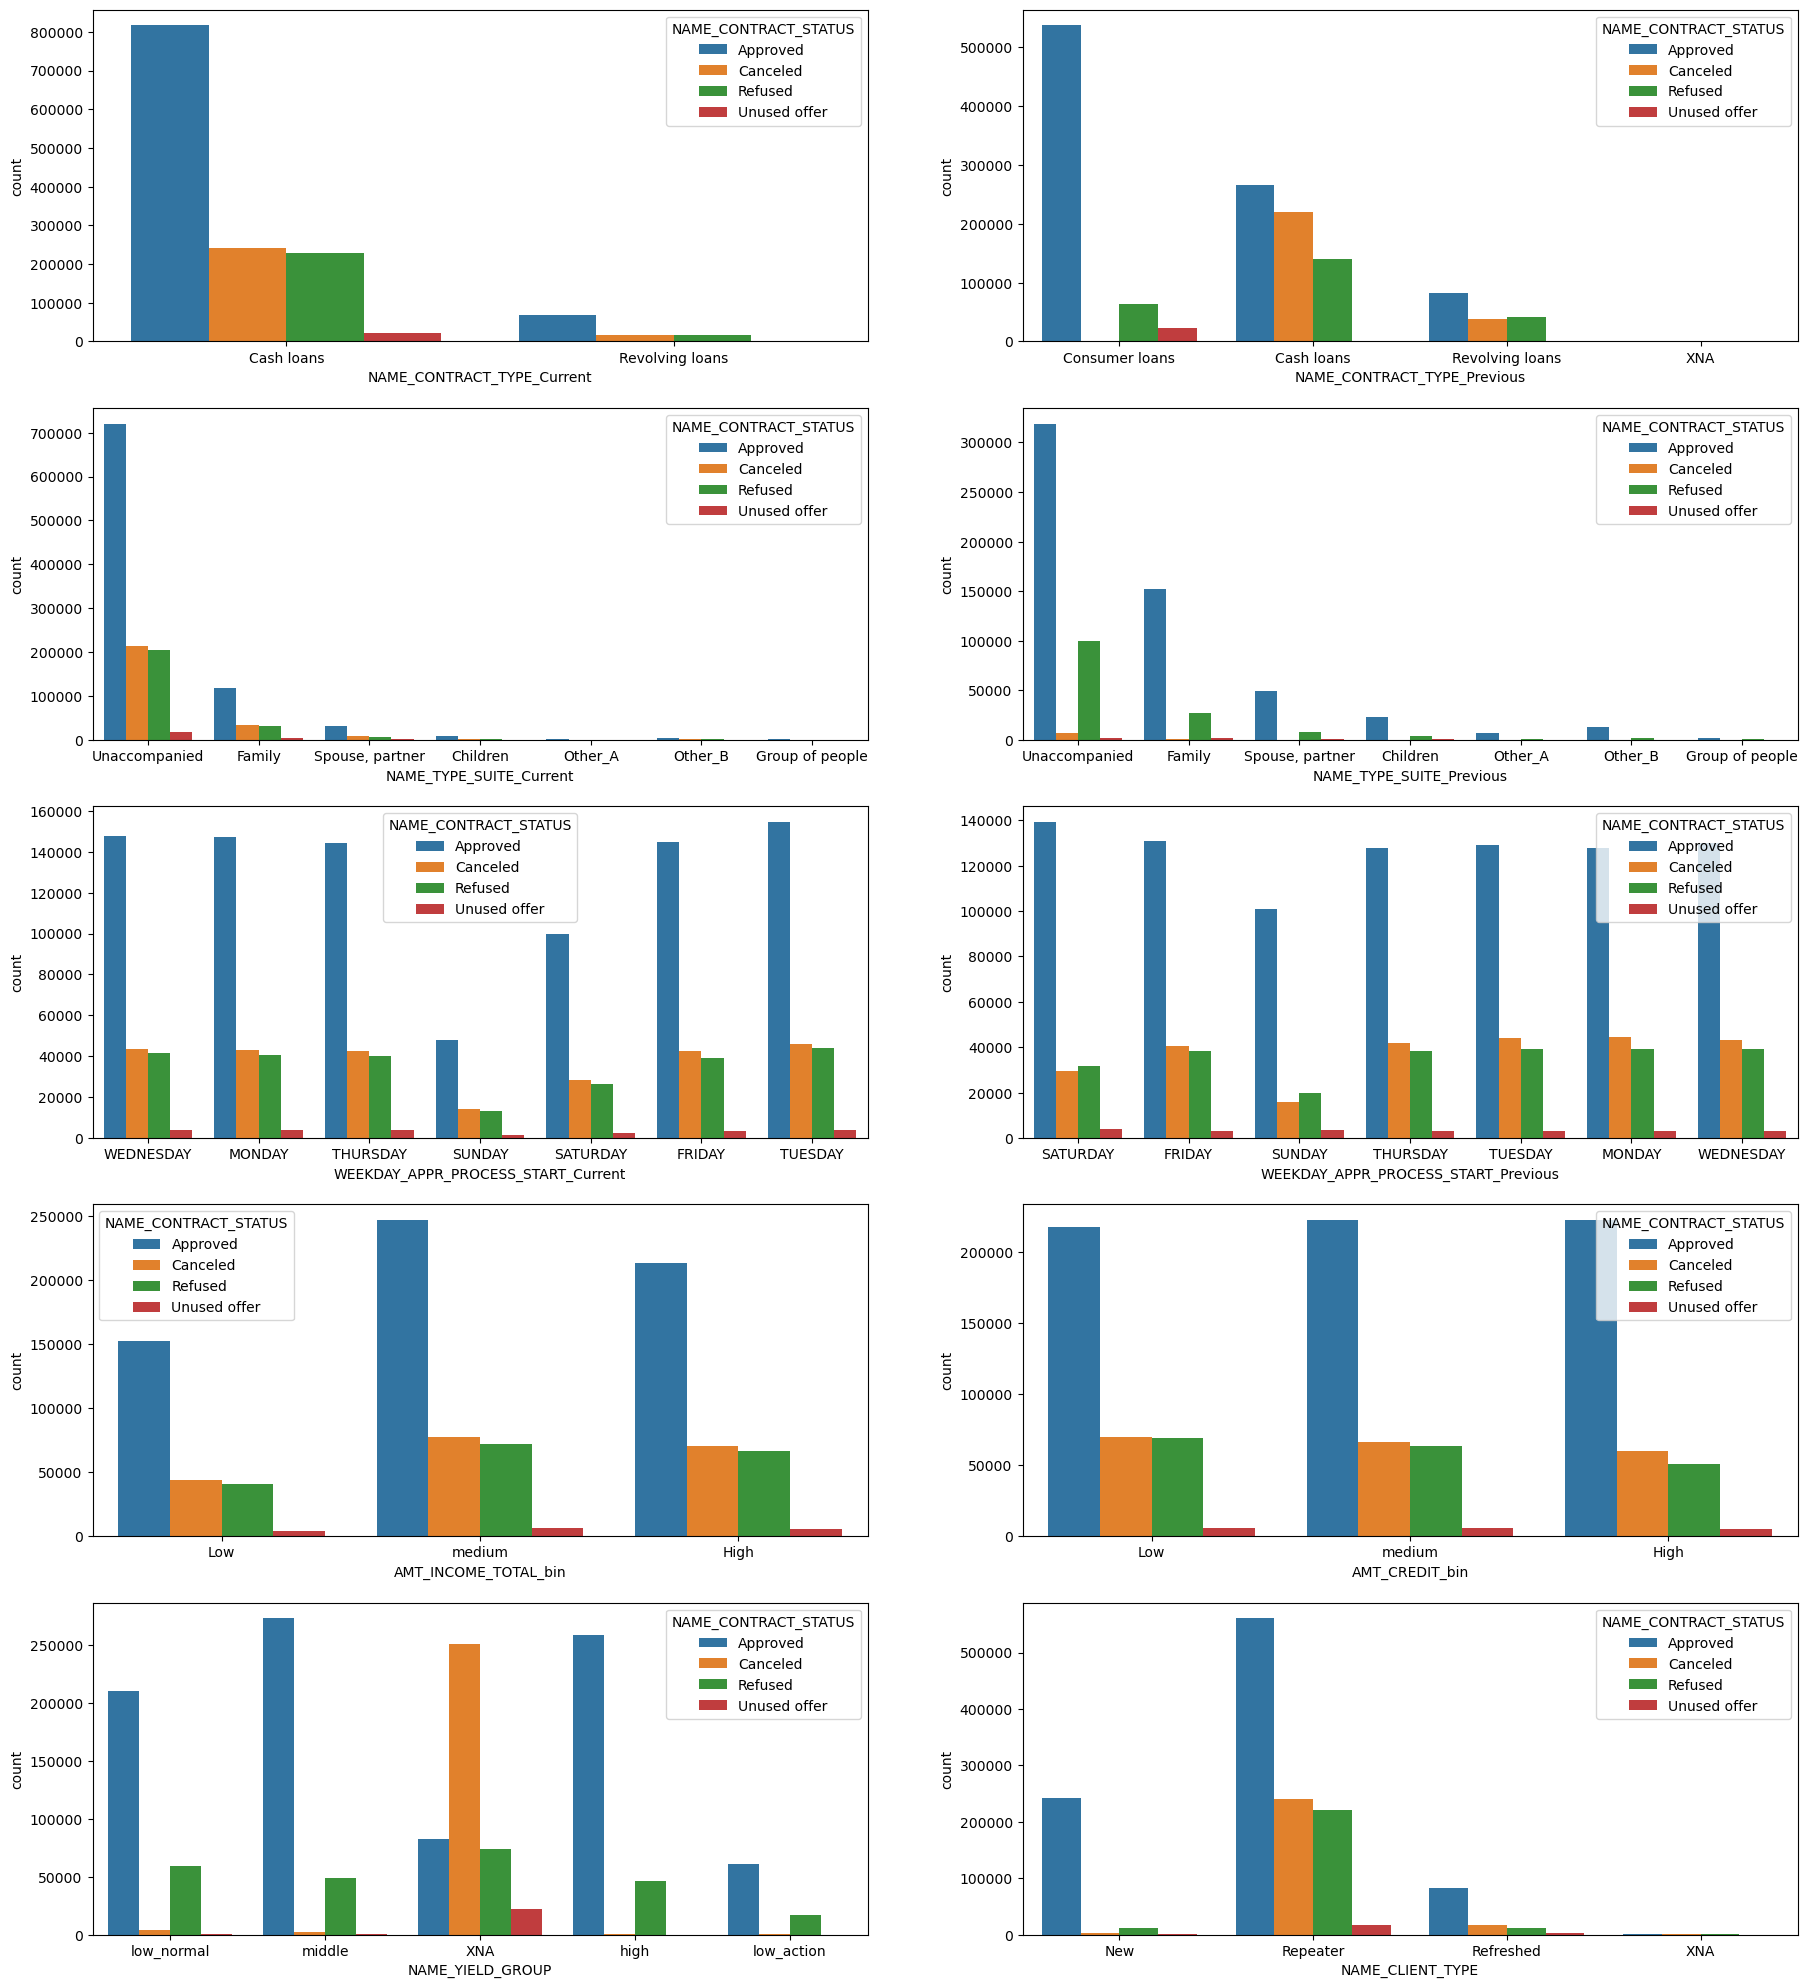

In [289]:
# Univariate Categorical analysis
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous','NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous','WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
'AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    
plt.show()

#### Insights
- Repeater are having highest number of approved loans.
- Middle NAME_YIELD_GROUP are having highest approval.
-  AMT_CREDIT_BIN values does not affect loan approvals.
- for Medium category in  AMT_INCOME_TOTAL_bin the approval is highest .
- in previous application_df  saturday has the highest approval rate.
- but in current application_df it is tuesday.
- unaccompanied has the highest number in both (in NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current).
- Bank is only giving two types of loans currently -Cash and Revolving Loans.
- Bank was providing Cash, Revolving and Consumer loans previously.
- Previously number of consumer loans were highest  and now  Cash loans is highest in number.

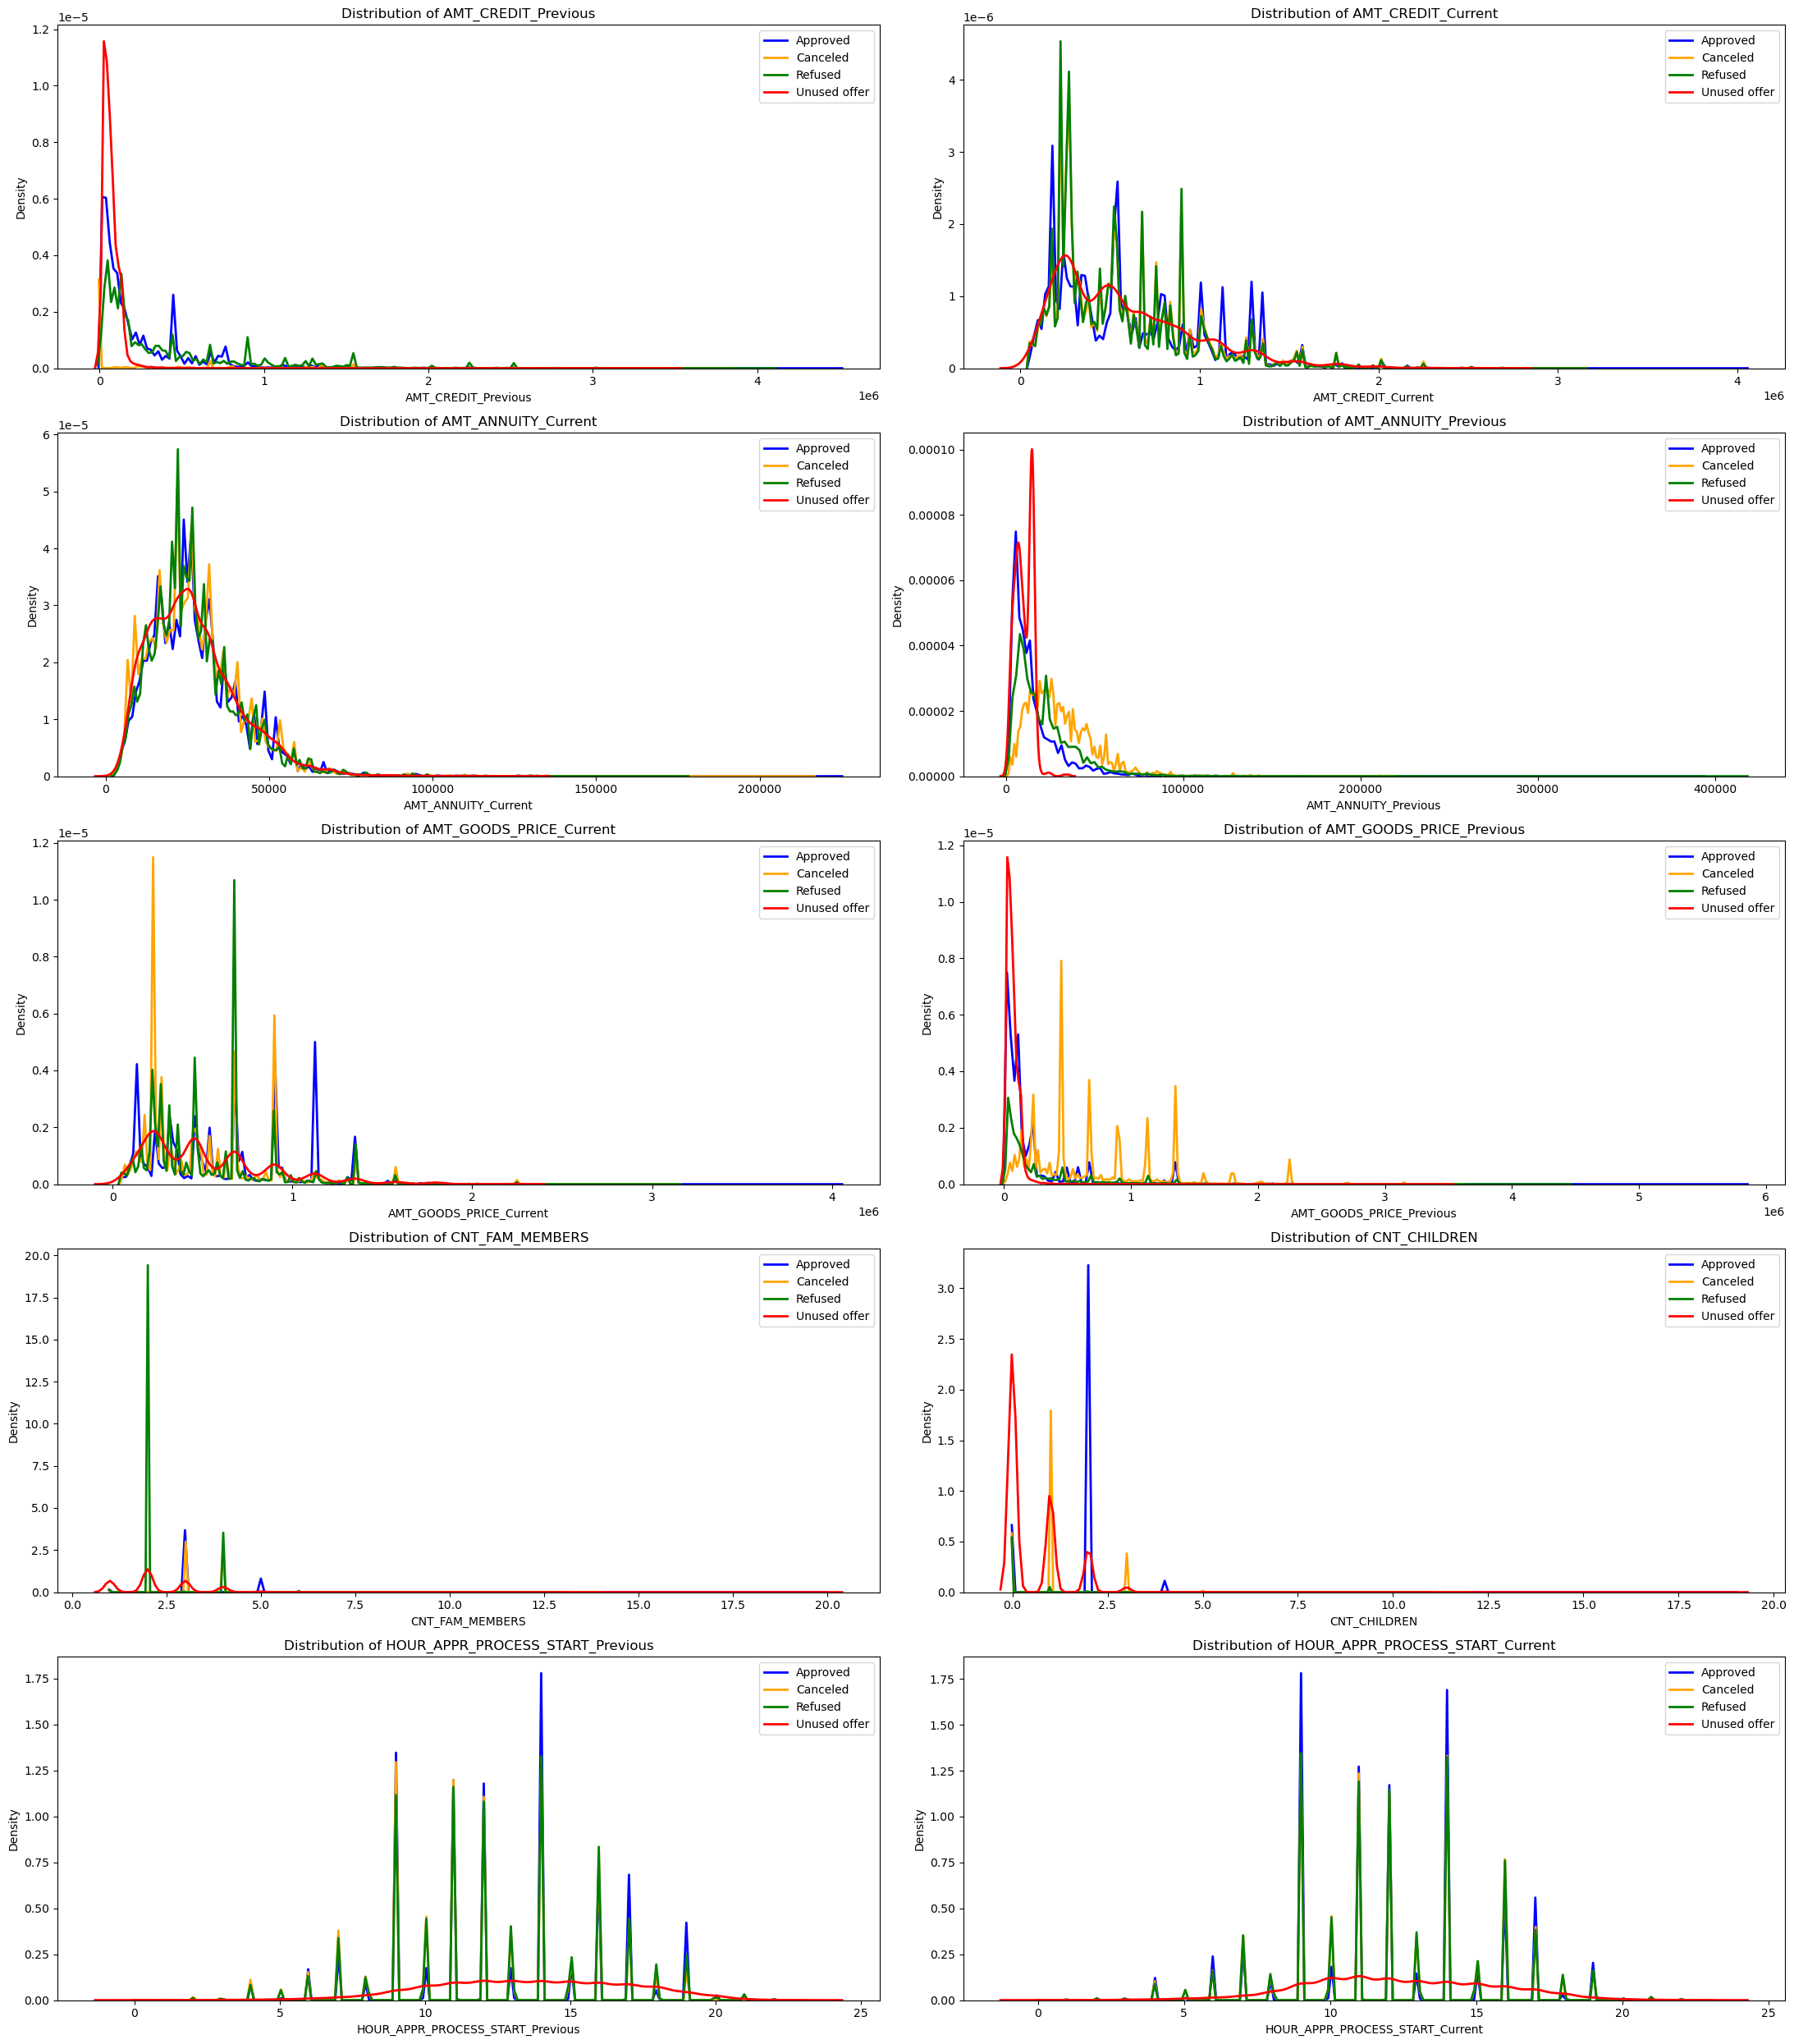

In [291]:
# Univariate Numerical analysis using only KDE (Kernel Density Estimation)
continous_columns = [
    'AMT_CREDIT_Previous', 'AMT_CREDIT_Current', 'AMT_ANNUITY_Current', 'AMT_ANNUITY_Previous',
    'AMT_GOODS_PRICE_Current', 'AMT_GOODS_PRICE_Previous', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
    'HOUR_APPR_PROCESS_START_Previous', 'HOUR_APPR_PROCESS_START_Current'
]

plt.figure(figsize=(22, 25))

# Loop through continuous columns to create subplots
for i in enumerate(continous_columns):
    plt.subplot(len(continous_columns) // 2, 2, i[0] + 1)
    
    # KDE plot for 'Approved' status
    sns.kdeplot(
        merged_df.loc[merged_df.NAME_CONTRACT_STATUS == 'Approved', :][i[1]].dropna(),
        label='Approved',
        color='blue',  # Color for 'Approved' status
        linewidth=2,
        bw_adjust=0.1  # Adjust bandwidth for KDE smoothing
    )
    
    # KDE plot for 'Canceled' status
    sns.kdeplot(
        merged_df.loc[merged_df.NAME_CONTRACT_STATUS == 'Canceled', :][i[1]].dropna(),
        label='Canceled',
        color='orange',  # Color for 'Canceled' status
        linewidth=2,
        bw_adjust=0.1  # Adjust bandwidth for KDE smoothing
    )
    
    # KDE plot for 'Refused' status
    sns.kdeplot(
        merged_df.loc[merged_df.NAME_CONTRACT_STATUS == 'Refused', :][i[1]].dropna(),
        label='Refused',
        color='green',  # Color for 'Refused' status
        linewidth=2,
        bw_adjust=0.1  # Adjust bandwidth for KDE smoothing
    )
    
    # KDE plot for 'Unused offer' status
    sns.kdeplot(
        merged_df.loc[merged_df.NAME_CONTRACT_STATUS == 'Unused offer', :][i[1]].dropna(),
        label='Unused offer',
        color='red',     # Color for 'Unused offer' status
        linewidth=2
    )
    
    # Add a title and show legend
    plt.title(f"Distribution of {i[1]}")
    plt.legend()

plt.tight_layout()  # Adjust the subplots to prevent overlapping
plt.show()


#### Insights
 
- For both Current and Previous data high number of applications are filed in 9 AM to 2 PM,so busiest hours for bank are during 9 AM to 2 PM.
- It can be seen that nuclear family  take more loans.
- Bank had high unused offers previously but refused is high incase of AMT_GOODS_PRICE currently.
- Bank had high unused offers previously and cancelled/refused offers are similar for AMT_ANNUITY currently.
- Bank had high unused offers previouly and high number of refused offers for AMT_CREDIT currently.

### Bi-variate Analysis

#### Categorical bi-variate

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


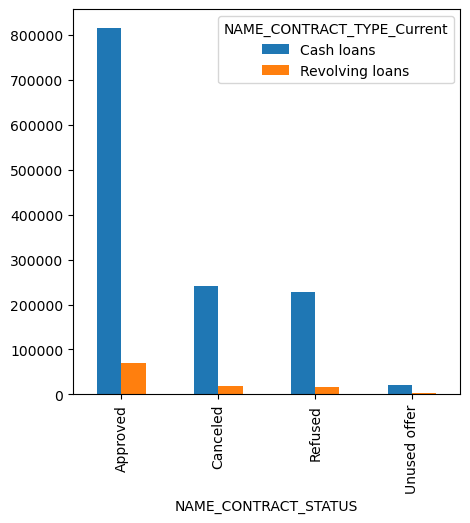

In [293]:
table_6= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(table_6)
table_6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Cash loans have the highest number of approved loans

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198507               10     170144   
Canceled                             59785                2      57674   
Refused                              58117                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455720  
Canceled                      15679        3          16   126282  
Refused                       15597        1          38   127832  
Unused offer                   1518        0           1    14255  


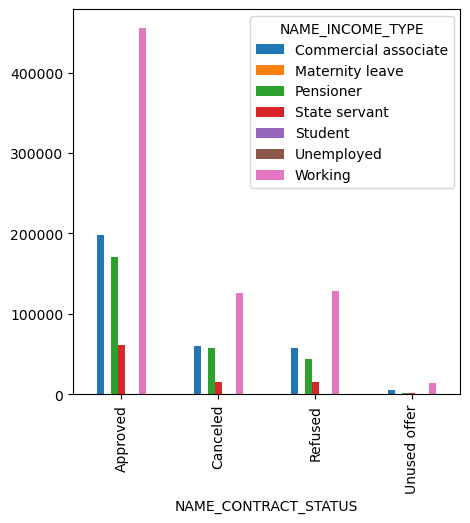

In [295]:
table_7= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(table_7)
table_7.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

 working applicant have highest number of approvals.

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            195002              27676   
Canceled                           64             57074               7917   
Refused                            91             54051               8635   
Unused offer                        6              6718                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10929                         652074  
Canceled                         3099                         191287  
Refused                          2971                         179642  
Unused offer                      165                          14899  


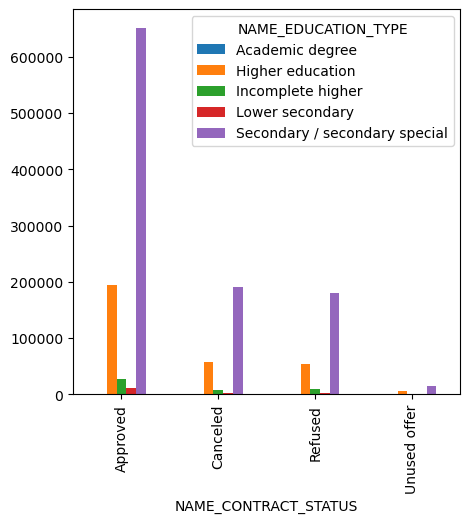

In [297]:
table_8= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(table_8)
table_8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

 Secondary/secondary special educated applicant have highest approval of loan.

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86827   577137      56750   
Canceled                       26143   167233      16535   
Refused                        28226   152167      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


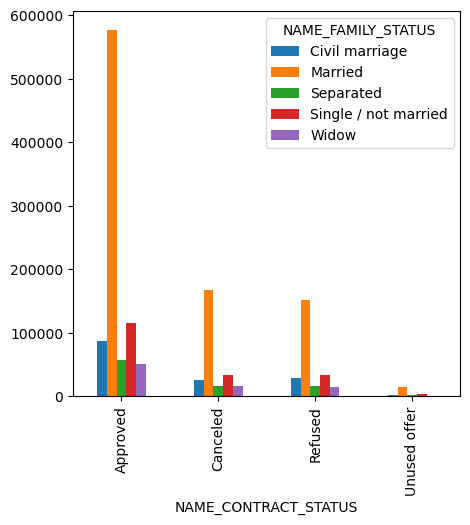

In [299]:
table_9= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(table_9)
table_9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


 insight-Married applicant has highest number of approvals

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791667                33138   
Canceled                          629             234120                 9149   
Refused                           659             219301                 8544   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


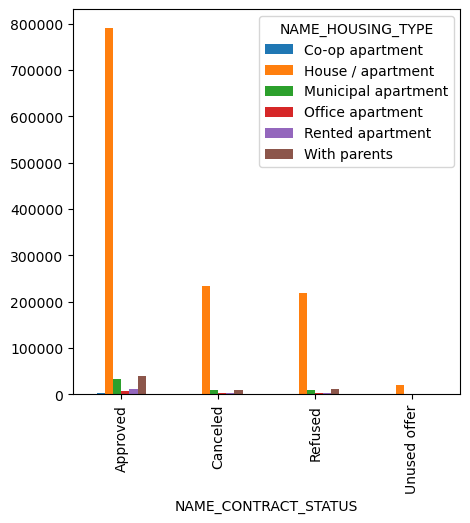

In [301]:
table_10= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(table_10)
table_10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


 House/apartment owner having highest number of approvals.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266381          537310            82408    0
Canceled                         220383            1329            37445  284
Refused                          139568           64282            41511   29
Unused offer                        432           22335                4    0


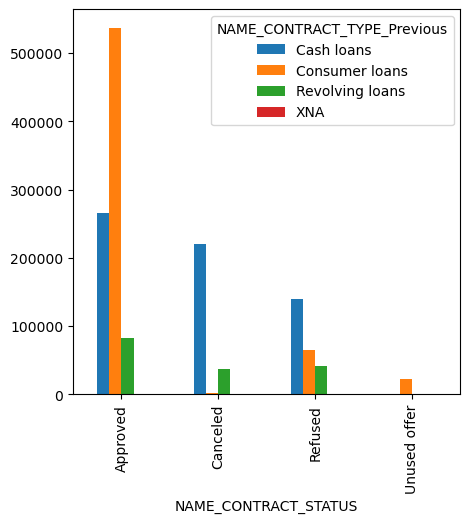

In [303]:
table_11= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(table_11)
table_11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


Consumer Loans have highest number of approval.

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242395      82891    560378  435
Canceled                2920      16104    239618  799
Refused                12358      12537    220215  280
Unused offer            1867       3404     17471   29


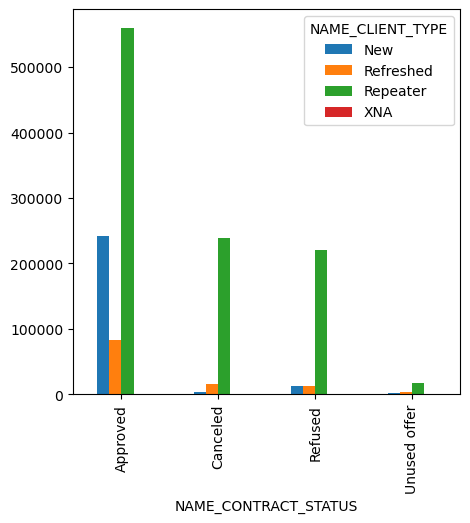

In [305]:
table_12= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CLIENT_TYPE'])
print(table_12)
table_12.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


most number of times repeated applications got approved

### Bi-variate categorical-Continous analysis

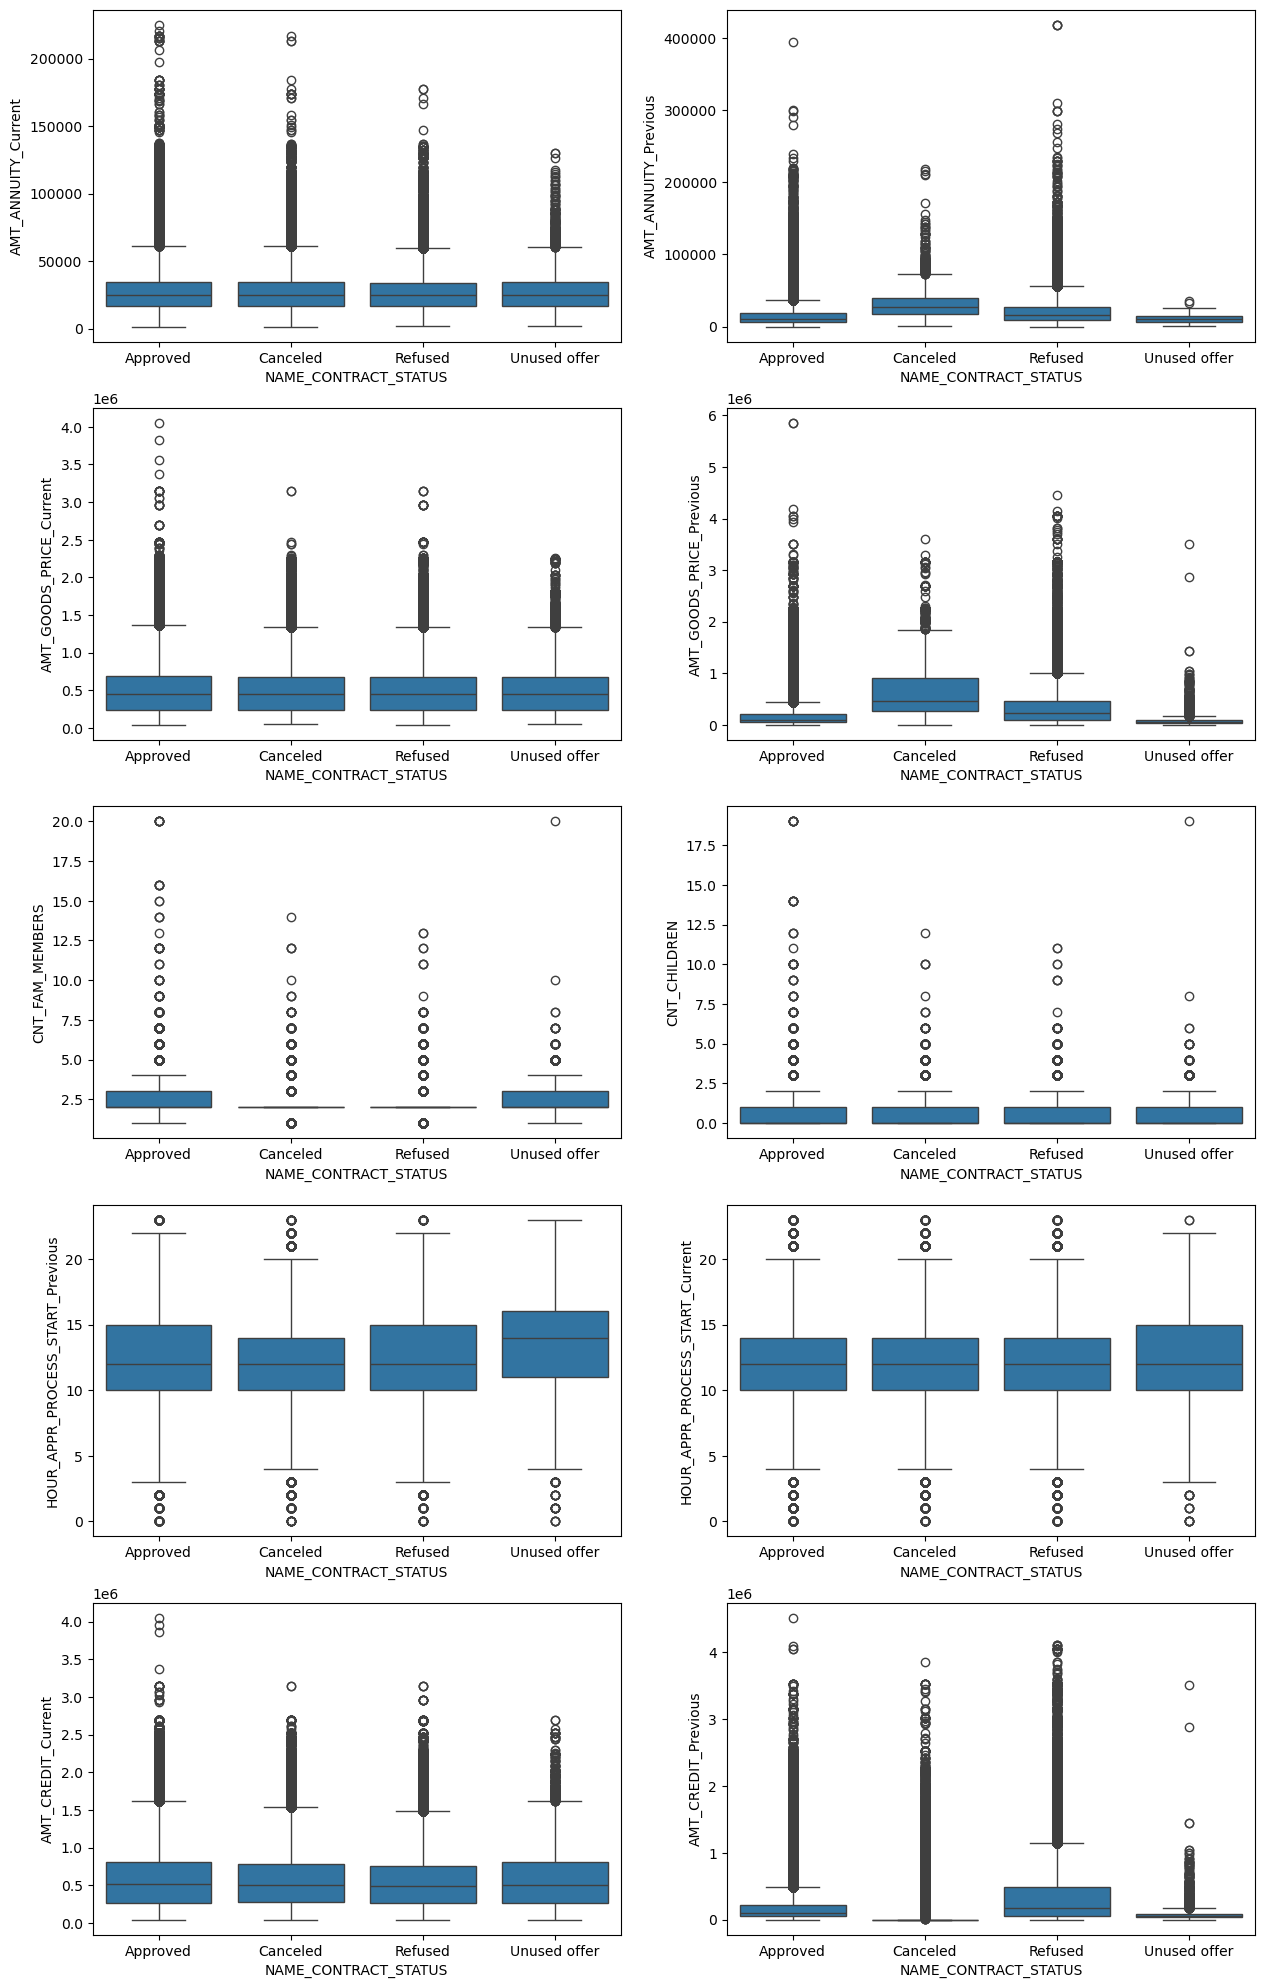

In [307]:
#Bi-variate categorical continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous','AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                  
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

#### Insights
-  AMT_CREDIT_Current is similar for all 4 cases & AMT_CREDIT_Previous has highest refused cases .
- time spent in unused offer is higher than categories so bank should reduce time spent on unused offer.
- highest approval for nuclear family(2-3 people in family) .
- Most of the applications were cancelled or refused prviously but now all four( Refused/Cancelled/Approved/Unused) have similar situation for AMT_GOODS_PRICE.
- Most of the applications were cancelled or refused previously but now  all four(Refused/Cancelled/Approved/Unused) have similar situation for AMT_ANNUITY.

### Final Words/Conclusion;-
 Target/ focused variable for operation dataset- TARGET 
 
 Target/ focused variable for former dataset- NAME_CONTRACT_STATUS 
 
 Top Major variables  the company should consider are:-

1.NAME_EDUCATION_TYPE

2.AMT_INCOME_TOTAL

3.DAYS_BIRTH

4.AMT_CREDIT

5.DAYS_EMPLOYED

6.AMT_ANNUITY

7.NAME_INCOME_TYPE

8.CODE_GENDER

9.NAME_HOUSING_TYPE

The above mentioned variables are to be considered by Company  before approving  loans to minimize  threat of loss.